In [1]:
import pandas as pd
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import sparse
from scipy import stats


In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)


In [3]:

maize_single_cell = sc.read_h5ad('/data/passala/Collaborator_Data/Maize_arabi_Jack_Collab/xu16_19_29_32_SeuratV4.0.1_finalclustermaize.h5ad')
arabi_single_cell = sc.read_h5ad('/data/passala/Collaborator_Data/Maize_arabi_Jack_Collab/xu_41_42.int_filter_recluster_final_forBen_arabi.h5ad')
maize_single_cell.var.set_index('_index', inplace= True)
arabi_single_cell.var.set_index('_index', inplace= True)

In [4]:
maize_single_cell.X.todense()

matrix([[1.08574646, 0.39905288, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.97616579, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.51677561, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [5]:
# maize_single_cell.raw = maize_single_cell
# arabi_single_cell.raw = arabi_single_cell


In [6]:
sc.set_figure_params(facecolor = 'white', figsize = (10,8))

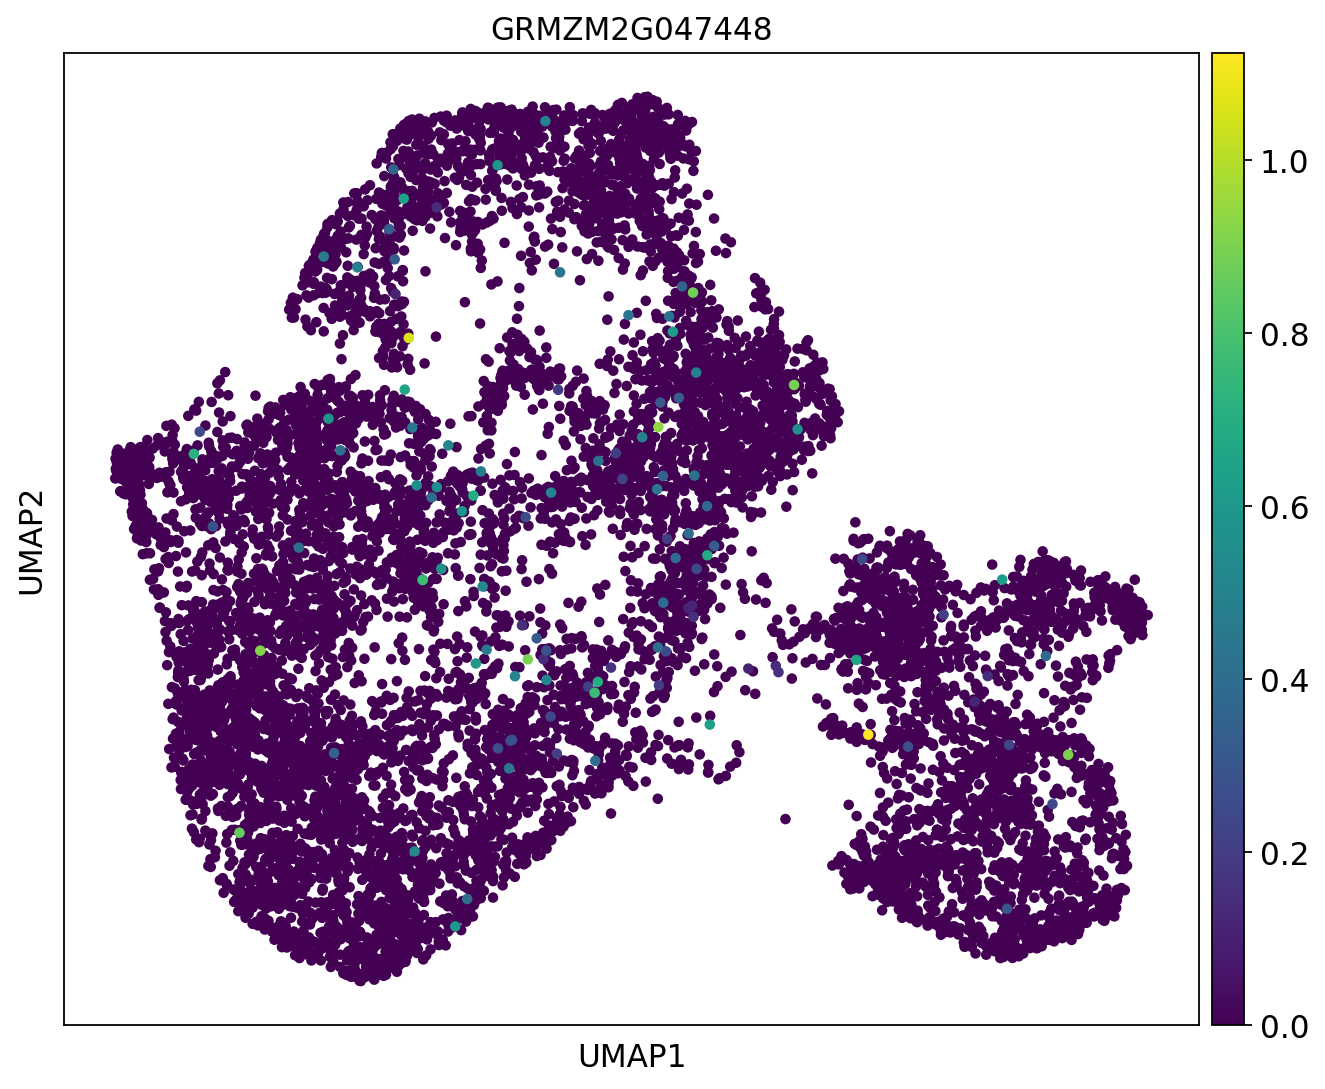

In [7]:
sc.pl.umap(maize_single_cell, color=['GRMZM2G047448'], use_raw= False, s = 90)


In [8]:
list_of_ADK_genes_in_maize = ['GRMZM2G540538','GRMZM2G135132','GRMZM2G003775','GRMZM2G089767']
list_of_PFKB_genes_in_maize = ['GRMZM2G051842','GRMZM2G171400','GRMZM2G007630','GRMZM2G178346','GRMZM2G121128','GRMZM2G132607','GRMZM2G132623']

In [9]:
maize_single_cell_trimmed_to_clevata_expressing = maize_single_cell[(maize_single_cell[:,'GRMZM2G372364'].X>0), : ]
maize_single_cell_trimmed_to_clevata_expressing


View of AnnData object with n_obs × n_vars = 1191 × 28492
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'DataSet', 'integrated_snn_res.1', 'seurat_clusters', 'test_res.1', 'determinate', 'subcluster9', 'mygraph_res.1'
    var: 'features'
    obsm: 'X_umap'

In [10]:
sc.pp.filter_genes(data = maize_single_cell_trimmed_to_clevata_expressing,min_cells = 10)
maize_single_cell_trimmed_to_clevata_expressing

filtered out 6830 genes that are detected in less than 10 cells


/home/passala/miniconda3/envs/Single_cell_data/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/home/passala/miniconda3/envs/Single_cell_data/lib/python3.9/contextlib.py:126: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)


AnnData object with n_obs × n_vars = 1191 × 21662
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'DataSet', 'integrated_snn_res.1', 'seurat_clusters', 'test_res.1', 'determinate', 'subcluster9', 'mygraph_res.1'
    var: 'features', 'n_cells'
    obsm: 'X_umap'

In [11]:

# fig, ax = plt.subplots(figsize = (15,12))
# fig.patch.set_facecolor('white')
# ax = sns.histplot(data =maize_single_cell_trimmed_to_clevata_expressing.var, x ='n_cells', bins =500)
# plt.ylabel("Count", fontsize = 20)
# plt.xlabel("Number Of Cells Gene Is Expressed In", fontsize = 20)
# sns.despine()

# ax.grid(False)
# ax.spines["bottom"].set_color("black")
# ax.spines["left"].set_color("black")
# plt.xlim((0,100))
# plt.title("Thresholding at 10 eliminates rarely expressed genes", fontsize = 20)
# plt.xticks(fontsize = 11, ticks = [0,10,20,30,40,50])
# plt.yticks(fontsize = 11)

In [12]:
maize_single_cell_clevata_expressing_pd = pd.DataFrame(data = maize_single_cell_trimmed_to_clevata_expressing.X.todense(), columns = maize_single_cell_trimmed_to_clevata_expressing.var.index, index = maize_single_cell_trimmed_to_clevata_expressing.obs.index)
maize_single_cell_clevata_expressing_pd

_index,GRMZM2G059865,GRMZM2G093344,GRMZM2G306216,GRMZM2G023794,GRMZM2G471814,GRMZM2G330436,GRMZM2G032104,GRMZM2G333069,GRMZM2G399700,GRMZM2G172183,...,INFA,RPS8.6,RPL14,GRMZM5G853305,RPS3.1,NDHD,GRMZM2G372364,GRMZM2G103059,GRMZM2G051466,GRMZM2G033074
AAAGAACGTTCGCGTG-1_1,0.219234,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.683343,0.0,0.000000,...,0.219234,0.219234,0.000000,0.219234,0.683343,0.219234,0.683343,0.0,0.0,0.000000
AAAGAACTCTTACACT-1_1,0.883206,0.0,0.0,0.0,0.000000,0.000000,0.387220,0.000000,0.0,0.000000,...,0.000000,1.061783,0.883206,0.000000,1.213250,0.387220,1.565077,0.0,0.0,0.000000
AAAGGTAGTGTTCAGT-1_1,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.388790,0.000000,0.000000,0.388790,0.000000,0.388790,0.0,0.0,0.000000
AACAAAGCAAGTGGGT-1_1,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.974519,0.000000,0.0,0.000000,...,0.974519,1.783337,1.458565,0.974519,0.974519,0.000000,1.458565,0.0,0.0,0.000000
AACAAAGCAGTTAAAG-1_1,0.918607,0.0,0.0,0.0,0.000000,0.000000,0.918607,0.000000,0.0,0.000000,...,0.918607,0.918607,0.000000,0.000000,1.389189,0.000000,0.918607,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTCTAACGTCCGTACG-1_4,0.590538,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.590538,...,0.000000,0.590538,0.000000,0.000000,0.590538,0.000000,0.590538,0.0,0.0,0.000000
TTGCATTAGCTACTAC-1_4,0.618058,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.384700,0.997186,0.000000,1.384700,0.000000,0.356038,0.0,0.0,0.356038
TTGTTGTTCACCGACG-1_4,0.509567,0.0,0.0,0.0,0.000000,0.000000,0.509567,0.000000,0.0,0.000000,...,0.509567,0.509567,0.936353,0.000000,1.167899,0.000000,0.200099,0.0,0.0,0.000000
TTTACGTCACGCGTCA-1_4,0.628428,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,1.011354,0.000000,1.832256,0.000000,0.628428,0.0,0.0,0.000000


In [13]:
maize_single_cell_clevata_expressing_pd = maize_single_cell_clevata_expressing_pd.loc[:, (maize_single_cell_clevata_expressing_pd != 0).any(axis=0)]

In [14]:
maize_single_cell_clevata_expressing_pd

_index,GRMZM2G059865,GRMZM2G093344,GRMZM2G306216,GRMZM2G023794,GRMZM2G471814,GRMZM2G330436,GRMZM2G032104,GRMZM2G333069,GRMZM2G399700,GRMZM2G172183,...,INFA,RPS8.6,RPL14,GRMZM5G853305,RPS3.1,NDHD,GRMZM2G372364,GRMZM2G103059,GRMZM2G051466,GRMZM2G033074
AAAGAACGTTCGCGTG-1_1,0.219234,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.683343,0.0,0.000000,...,0.219234,0.219234,0.000000,0.219234,0.683343,0.219234,0.683343,0.0,0.0,0.000000
AAAGAACTCTTACACT-1_1,0.883206,0.0,0.0,0.0,0.000000,0.000000,0.387220,0.000000,0.0,0.000000,...,0.000000,1.061783,0.883206,0.000000,1.213250,0.387220,1.565077,0.0,0.0,0.000000
AAAGGTAGTGTTCAGT-1_1,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.388790,0.000000,0.000000,0.388790,0.000000,0.388790,0.0,0.0,0.000000
AACAAAGCAAGTGGGT-1_1,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.974519,0.000000,0.0,0.000000,...,0.974519,1.783337,1.458565,0.974519,0.974519,0.000000,1.458565,0.0,0.0,0.000000
AACAAAGCAGTTAAAG-1_1,0.918607,0.0,0.0,0.0,0.000000,0.000000,0.918607,0.000000,0.0,0.000000,...,0.918607,0.918607,0.000000,0.000000,1.389189,0.000000,0.918607,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTCTAACGTCCGTACG-1_4,0.590538,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.590538,...,0.000000,0.590538,0.000000,0.000000,0.590538,0.000000,0.590538,0.0,0.0,0.000000
TTGCATTAGCTACTAC-1_4,0.618058,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.384700,0.997186,0.000000,1.384700,0.000000,0.356038,0.0,0.0,0.356038
TTGTTGTTCACCGACG-1_4,0.509567,0.0,0.0,0.0,0.000000,0.000000,0.509567,0.000000,0.0,0.000000,...,0.509567,0.509567,0.936353,0.000000,1.167899,0.000000,0.200099,0.0,0.0,0.000000
TTTACGTCACGCGTCA-1_4,0.628428,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,1.011354,0.000000,1.832256,0.000000,0.628428,0.0,0.0,0.000000


In [15]:
clevata_expressing_cells_correlation = maize_single_cell_clevata_expressing_pd.corr(method = 'spearman', )
clev_tester = clevata_expressing_cells_correlation


In [16]:
#clevata_expressing_cells_correlation_pearson = maize_single_cell_clevata_expressing_pd.corr()

In [17]:
#clevata_expressing_cells_correlation_pearson

In [18]:
clevata_expressing_cells_correlation.tail(20)

_index,GRMZM2G059865,GRMZM2G093344,GRMZM2G306216,GRMZM2G023794,GRMZM2G471814,GRMZM2G330436,GRMZM2G032104,GRMZM2G333069,GRMZM2G399700,GRMZM2G172183,...,INFA,RPS8.6,RPL14,GRMZM5G853305,RPS3.1,NDHD,GRMZM2G372364,GRMZM2G103059,GRMZM2G051466,GRMZM2G033074
_index,,,,,,,,,,,,,,,,,,,,,
YCF70,0.059244,0.019144,0.005421,0.017519,-0.046041,0.004313,-0.026773,0.022213,0.064434,-0.040259,...,0.050289,0.181000,0.155732,0.079984,0.147862,0.116484,0.064196,0.014317,0.001055,0.065353
RPOB,-0.007747,0.013528,-0.022191,0.042762,0.017245,0.055547,-0.012154,-0.048936,-0.001291,-0.001035,...,0.101824,0.092981,0.089149,0.072036,0.052144,0.025773,-0.007337,0.041112,0.008694,0.027661
RPOC1,0.016900,-0.022504,0.006365,0.058460,0.073933,-0.034285,-0.016042,0.038407,0.047302,0.061651,...,0.003879,0.049287,0.098520,0.074489,0.060199,0.014877,0.027574,-0.027617,0.022051,-0.005952
RPOC2,-0.006388,-0.014316,0.023055,-0.013458,0.030508,-0.002372,-0.017394,0.027778,0.029019,0.011830,...,0.057764,0.049400,0.032445,0.018257,0.020225,0.048956,-0.068971,-0.008759,0.039183,-0.010319
ATPI,0.008823,0.035942,-0.002305,0.054167,-0.000135,0.015150,-0.039950,0.065505,0.081959,0.017433,...,0.110366,0.222223,0.127417,0.136002,0.110191,0.120931,-0.088703,0.115473,0.059129,0.151074
CEMA,0.021115,-0.033101,-0.019904,0.049021,-0.007934,-0.001630,-0.090218,0.049044,0.012700,-0.032882,...,0.037408,0.144483,0.136324,-0.002842,0.112423,0.076688,-0.103224,0.102149,0.061224,0.217828
CLPP,-0.056852,-0.025469,-0.016374,-0.018337,-0.014740,0.048469,0.006947,0.074692,-0.023684,0.010514,...,0.005459,0.067581,0.031494,0.021670,0.005998,0.007980,-0.045210,0.125755,0.048842,0.031577
PSBH,0.000047,0.031624,0.007927,0.065512,-0.022885,-0.004296,-0.002928,-0.051459,-0.012133,-0.003899,...,0.003051,-0.016723,-0.039650,-0.013736,-0.045317,-0.041193,0.001998,0.003496,0.020469,-0.026986
RPOA,0.011838,0.003281,0.035270,0.004076,0.008384,0.048099,-0.021084,-0.018210,-0.005917,0.041565,...,0.076478,0.154618,0.112308,0.078471,0.149836,0.099827,0.051224,0.039557,0.011754,0.084164


In [19]:
clevata_expressing_cells_correlation

_index,GRMZM2G059865,GRMZM2G093344,GRMZM2G306216,GRMZM2G023794,GRMZM2G471814,GRMZM2G330436,GRMZM2G032104,GRMZM2G333069,GRMZM2G399700,GRMZM2G172183,...,INFA,RPS8.6,RPL14,GRMZM5G853305,RPS3.1,NDHD,GRMZM2G372364,GRMZM2G103059,GRMZM2G051466,GRMZM2G033074
_index,,,,,,,,,,,,,,,,,,,,,
GRMZM2G059865,1.000000,0.023164,0.015834,0.047484,-0.007815,0.020896,0.065861,-0.003459,0.005670,0.016407,...,0.080770,0.013679,0.080516,0.070163,0.032561,-0.002322,0.027378,-0.000657,-0.034938,0.004677
GRMZM2G093344,0.023164,1.000000,-0.021180,0.013702,-0.019067,0.070529,-0.019708,0.020465,0.026543,-0.011744,...,-0.004352,0.025700,0.020452,0.019991,0.001688,0.008448,-0.003972,0.013643,-0.017525,-0.022484
GRMZM2G306216,0.015834,-0.021180,1.000000,-0.015249,-0.012258,0.026220,0.040279,0.005141,-0.019696,0.011471,...,-0.026455,0.003326,-0.002975,0.019687,0.012859,-0.039043,-0.016724,-0.014857,-0.011266,-0.014454
GRMZM2G023794,0.047484,0.013702,-0.015249,1.000000,-0.013728,0.013133,-0.018365,0.026331,-0.022058,-0.042649,...,0.030820,0.045383,0.041274,-0.016951,-0.012477,0.029233,-0.035918,0.034505,-0.012617,-0.016188
GRMZM2G471814,-0.007815,-0.019067,-0.012258,-0.013728,1.000000,0.012490,-0.044498,-0.024814,-0.017731,-0.008840,...,0.016292,0.001010,-0.071166,-0.015627,0.004103,-0.009997,-0.050094,-0.013375,-0.010142,-0.013013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NDHD,-0.002322,0.008448,-0.039043,0.029233,-0.009997,0.009957,-0.091422,0.011813,0.027286,0.035012,...,0.081611,0.151823,0.114360,0.055859,0.072413,1.000000,-0.039850,0.074359,0.018787,0.062145
GRMZM2G372364,0.027378,-0.003972,-0.016724,-0.035918,-0.050094,-0.050360,0.060768,-0.130961,-0.004182,-0.033289,...,0.000704,-0.038433,0.073208,-0.031923,0.116332,-0.039850,1.000000,-0.122853,-0.071399,-0.082476
GRMZM2G103059,-0.000657,0.013643,-0.014857,0.034505,-0.013375,0.044236,-0.056565,0.083815,0.017834,-0.000223,...,0.075885,0.075320,0.066409,0.091786,0.044785,0.074359,-0.122853,1.000000,0.056936,0.092512


In [20]:
clevata_expressing_cells_correlation = clevata_expressing_cells_correlation.dropna(axis = 0, how = 'all')
clevata_expressing_cells_correlation = clevata_expressing_cells_correlation.dropna(axis = 1, how = 'all')
ranked_columns_clevata = clevata_expressing_cells_correlation.rank()
ranked_columns_clevata

_index,GRMZM2G059865,GRMZM2G093344,GRMZM2G306216,GRMZM2G023794,GRMZM2G471814,GRMZM2G330436,GRMZM2G032104,GRMZM2G333069,GRMZM2G399700,GRMZM2G172183,...,INFA,RPS8.6,RPL14,GRMZM5G853305,RPS3.1,NDHD,GRMZM2G372364,GRMZM2G103059,GRMZM2G051466,GRMZM2G033074
_index,,,,,,,,,,,,,,,,,,,,,
GRMZM2G059865,21662.0,15427.0,15184.0,18963.0,8412.0,11541.0,20525.0,5166.0,10661.0,12556.0,...,21213.0,10525.0,21287.0,20929.0,19780.0,6772.0,20074.0,5707.0,1717.0,9783.0
GRMZM2G093344,11727.0,21662.0,4387.0,12366.0,3938.5,20670.0,6145.0,10082.0,15719.0,5174.0,...,6192.0,13017.0,15538.0,12985.0,14824.0,9128.0,18435.0,7750.5,5136.5,4154.0
GRMZM2G306216,10191.0,4051.5,21662.0,5183.0,6609.5,12998.0,18333.0,6782.0,4321.0,11236.0,...,2240.0,8368.0,10032.0,12899.0,17108.0,1526.0,17349.0,3608.5,7673.5,6275.5
GRMZM2G023794,16238.0,13137.0,6697.0,21662.0,5945.0,9394.0,6447.0,11343.0,3638.5,685.0,...,15178.0,16629.0,18996.0,3635.0,11530.0,14056.0,15153.0,11329.5,7037.5,5746.0
GRMZM2G471814,5550.0,4696.5,8180.0,5767.0,21662.0,9213.0,2340.0,2197.5,4966.0,5814.0,...,11423.0,7898.0,890.0,3889.0,15404.0,5253.0,13084.0,4000.5,8239.0,6737.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NDHD,6509.0,11691.0,849.0,15868.0,7806.0,8544.0,193.0,8172.0,15877.0,16966.0,...,21239.0,21579.0,21571.0,19856.0,21409.0,21662.0,14617.0,17374.0,14213.0,17790.0
GRMZM2G372364,12555.0,8382.0,6070.0,1030.0,160.0,228.0,20233.0,6.0,8265.0,1547.0,...,7414.0,2338.0,21117.0,1502.0,21606.0,1468.0,21662.0,19.0,127.0,430.0
GRMZM2G103059,6826.0,13124.0,6867.0,16922.0,6092.5,17306.0,1322.0,19994.0,13773.0,8095.0,...,21046.0,20029.0,20891.0,21521.0,20645.0,20375.0,3547.0,21662.0,19340.0,19846.0


In [21]:
double_ranked_clevata = ranked_columns_clevata.rank(axis = 1)
 
normalized_clevata = double_ranked_clevata/21662

clevata_corr_results = normalized_clevata.loc[normalized_clevata.index =='GRMZM2G372364'].squeeze()

In [22]:
normalized_clevata

_index,GRMZM2G059865,GRMZM2G093344,GRMZM2G306216,GRMZM2G023794,GRMZM2G471814,GRMZM2G330436,GRMZM2G032104,GRMZM2G333069,GRMZM2G399700,GRMZM2G172183,...,INFA,RPS8.6,RPL14,GRMZM5G853305,RPS3.1,NDHD,GRMZM2G372364,GRMZM2G103059,GRMZM2G051466,GRMZM2G033074
_index,,,,,,,,,,,,,,,,,,,,,
GRMZM2G059865,1.000000,0.663674,0.653933,0.823724,0.371572,0.500162,0.915451,0.240536,0.463369,0.541294,...,0.971609,0.458614,0.977957,0.946219,0.868918,0.304958,0.885837,0.259925,0.093828,0.428238
GRMZM2G093344,0.673460,1.000000,0.277675,0.702244,0.245130,0.981350,0.390430,0.596575,0.839627,0.330579,...,0.393154,0.730588,0.832518,0.729203,0.804450,0.546533,0.926461,0.477934,0.327855,0.262095
GRMZM2G306216,0.676484,0.288801,1.000000,0.382213,0.488921,0.776683,0.937933,0.501662,0.311190,0.715677,...,0.135537,0.598837,0.670391,0.772920,0.904326,0.076701,0.910258,0.252054,0.558674,0.465746
GRMZM2G023794,0.848490,0.717316,0.390569,1.000000,0.337780,0.541709,0.372980,0.635814,0.172583,0.012649,...,0.806504,0.863655,0.939272,0.172399,0.644493,0.758494,0.805674,0.634983,0.412289,0.323100
GRMZM2G471814,0.330671,0.268073,0.515326,0.348213,1.000000,0.577232,0.100060,0.089373,0.288316,0.351468,...,0.682924,0.496907,0.019920,0.206883,0.833210,0.308928,0.747761,0.214985,0.518950,0.419583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NDHD,0.295287,0.552050,0.030030,0.762164,0.360355,0.394608,0.005609,0.376627,0.762972,0.817861,...,0.991344,0.998661,0.998407,0.946612,0.995014,1.000000,0.701136,0.836580,0.680893,0.856523
GRMZM2G372364,0.898209,0.855184,0.825224,0.674222,0.471240,0.515511,0.965031,0.130967,0.853892,0.710876,...,0.843459,0.744622,0.985181,0.708199,0.998546,0.706421,1.000000,0.224702,0.441187,0.587296
GRMZM2G103059,0.229988,0.455960,0.231511,0.622403,0.199982,0.641515,0.018235,0.820538,0.479642,0.279891,...,0.915497,0.823677,0.900563,0.968539,0.877781,0.852068,0.087388,1.000000,0.771835,0.809851


In [23]:
#clevata_corr_results.to_csv('/home/passala/Gene_duplication_project/Code/Jack_Dave_maize_project/Files_for_Jack_correlation/dropped_low_expression_genes_clevata_only_corr_results_maize.csv')

In [24]:
#normalized_clevata.to_csv('/home/passala/Gene_duplication_project/Code/Jack_Dave_maize_project/Files_for_Jack_correlation/dropped_low_expression_genes_coexpression_ranks_in_clevata_expressing_cells.csv')

In [25]:
clevata_corr_results[['GRMZM2G540538','GRMZM2G135132','GRMZM2G089767']]

_index
GRMZM2G540538    0.962238
GRMZM2G135132    0.294917
GRMZM2G089767    0.579609
Name: GRMZM2G372364, dtype: float64

In [26]:
clevata_corr_results[list_of_PFKB_genes_in_maize]

_index
GRMZM2G051842    0.928031
GRMZM2G171400    0.331802
GRMZM2G007630    0.461222
GRMZM2G178346    0.380413
GRMZM2G121128    0.763734
GRMZM2G132607    0.130967
GRMZM2G132623    0.522389
Name: GRMZM2G372364, dtype: float64

In [27]:
maize_single_cell_trimmed_to_wuschel_expressing_genes = maize_single_cell[(maize_single_cell[:,'GRMZM2G047448'].X>0), : ]
maize_single_cell_non_wuschel_expressing_cells = maize_single_cell[(maize_single_cell[:,'GRMZM2G047448'].X==0), : ]

/home/passala/miniconda3/envs/Single_cell_data/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3398: SparseEfficiencyWarning: Comparing a sparse matrix with 0 using == is inefficient, try using != instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [28]:
sc.pp.filter_genes(data = maize_single_cell_non_wuschel_expressing_cells,min_cells = 10)
maize_single_cell_non_wuschel_expressing_cells


filtered out 2398 genes that are detected in less than 10 cells


/home/passala/miniconda3/envs/Single_cell_data/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/home/passala/miniconda3/envs/Single_cell_data/lib/python3.9/contextlib.py:126: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)


AnnData object with n_obs × n_vars = 10442 × 26094
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'DataSet', 'integrated_snn_res.1', 'seurat_clusters', 'test_res.1', 'determinate', 'subcluster9', 'mygraph_res.1'
    var: 'features', 'n_cells'
    obsm: 'X_umap'

In [29]:

# fig, ax = plt.subplots(figsize = (15,12))
# fig.patch.set_facecolor('white')
# ax = sns.histplot(data =maize_single_cell_non_wuschel_expressing_cells.var, x ='n_cells', bins =4000)
# plt.ylabel("Count", fontsize = 20)
# plt.xlabel("Number Of Cells Gene Is Expressed In", fontsize = 20)
# sns.despine()

# ax.grid(False)
# ax.spines["bottom"].set_color("black")
# ax.spines["left"].set_color("black")
# plt.xlim((0,100))
# plt.title("Thresholding at 10 eliminates rarely expressed genes", fontsize = 20)
# plt.xticks(fontsize = 11, ticks = [0,10,20,30,40,50])
# plt.yticks(fontsize = 11)

In [30]:
sc.pp.filter_genes(data = maize_single_cell_trimmed_to_wuschel_expressing_genes,min_cells = 10)
maize_single_cell_trimmed_to_wuschel_expressing_genes

filtered out 12535 genes that are detected in less than 10 cells


/home/passala/miniconda3/envs/Single_cell_data/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/home/passala/miniconda3/envs/Single_cell_data/lib/python3.9/contextlib.py:126: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)


AnnData object with n_obs × n_vars = 109 × 15957
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'DataSet', 'integrated_snn_res.1', 'seurat_clusters', 'test_res.1', 'determinate', 'subcluster9', 'mygraph_res.1'
    var: 'features', 'n_cells'
    obsm: 'X_umap'

In [31]:

# fig, ax = plt.subplots(figsize = (15,12))
# fig.patch.set_facecolor('white')
# ax = sns.histplot(data =maize_single_cell_trimmed_to_wuschel_expressing_genes.var, x ='n_cells', bins =500)
# plt.ylabel("Count", fontsize = 20)
# plt.xlabel("Number Of Cells Gene Is Expressed In", fontsize = 20)
# sns.despine()

# ax.grid(False)
# ax.spines["bottom"].set_color("black")
# ax.spines["left"].set_color("black")
# plt.xlim((0,100))
# plt.title("Thresholding at 10 eliminates rarely expressed genes", fontsize = 20)
# plt.xticks(fontsize = 11, ticks = [0,10,20,30,40,50])
# plt.yticks(fontsize = 11)

In [32]:
maize_single_cell_wuschel_expressing_pd = pd.DataFrame(data = maize_single_cell_trimmed_to_wuschel_expressing_genes.X.todense(), columns = maize_single_cell_trimmed_to_wuschel_expressing_genes.var.index, index = maize_single_cell_trimmed_to_wuschel_expressing_genes.obs.index)
maize_single_cell_wuschel_expressing_pd

_index,GRMZM2G059865,GRMZM2G330436,GRMZM2G032104,GRMZM2G333069,GRMZM2G073979,GRMZM2G374779,GRMZM2G374812,GRMZM2G002121,GRMZM2G026639,GRMZM2G161560,...,CEMA,RPOA,RPS11.3,INFA,RPS8.6,RPL14,GRMZM5G853305,RPS3.1,NDHD,GRMZM2G372364
AAAGGTAGTGTGCTTA-1_1,0.889409,0.0,0.889409,0.000000,0.889409,0.000000,0.0,0.000000,0.000000,0.889409,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AGGTCTAGTCTCTCTG-1_1,0.000000,0.0,0.000000,0.000000,0.000000,0.571181,0.0,0.000000,0.000000,1.406447,...,0.000000,0.000000,0.000000,0.000000,0.571181,0.571181,0.571181,0.932445,0.000000,0.571181
ATCGGCGGTGAGCGAT-1_1,0.554879,0.0,1.170992,0.554879,0.000000,0.000000,0.0,0.000000,0.000000,2.714222,...,0.000000,0.554879,0.000000,0.909653,0.909653,0.554879,0.000000,0.909653,0.554879,0.000000
ATGGGAGGTTTCACTT-1_1,0.852821,0.0,0.852821,0.000000,0.852821,0.000000,0.0,0.000000,0.000000,0.852821,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.852821,0.000000,0.000000
CGGAGAAAGCGATGGT-1_1,0.676593,0.0,0.676593,0.000000,0.000000,0.000000,0.0,0.394460,0.000000,1.076479,...,0.000000,0.000000,0.000000,0.394460,0.896393,0.000000,0.394460,0.896393,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTCTAACCACCCTGAG-1_4,0.549438,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.368414,...,0.549438,0.000000,0.000000,0.000000,1.162162,1.368414,0.549438,0.902012,0.549438,0.000000
TTGACCCGTCGAAGCA-1_4,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.254608,0.000000,2.074296,...,0.000000,0.254608,0.254608,0.000000,1.007861,0.770027,0.000000,0.895998,0.000000,0.000000
TTGGATGGTTAATGAG-1_4,0.716506,0.0,0.000000,0.000000,0.000000,0.299429,0.0,0.000000,0.000000,1.236524,...,0.000000,0.299429,0.000000,0.000000,0.873949,0.716506,0.000000,1.333081,0.000000,0.000000
TTTCAGTGTTTACTGG-1_4,0.000000,0.0,0.661202,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.337986,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.055788,0.000000,1.557824,0.000000,0.000000


In [33]:
wuschel_expressing_cells_correlation = maize_single_cell_wuschel_expressing_pd.corr(method = 'spearman')

In [36]:
maize_single_cell_wuschel_expressing_pd.corr(method = 'pearson')

_index,GRMZM2G059865,GRMZM2G330436,GRMZM2G032104,GRMZM2G333069,GRMZM2G073979,GRMZM2G374779,GRMZM2G374812,GRMZM2G002121,GRMZM2G026639,GRMZM2G161560,...,CEMA,RPOA,RPS11.3,INFA,RPS8.6,RPL14,GRMZM5G853305,RPS3.1,NDHD,GRMZM2G372364
_index,,,,,,,,,,,,,,,,,,,,,
GRMZM2G059865,1.000000,-0.074279,0.163829,-0.059155,0.067111,-0.087381,0.126534,0.015777,0.232215,0.004177,...,0.111538,-0.067400,0.055008,-0.015216,0.033235,-0.037556,-0.076419,-0.127982,-0.017626,0.018316
GRMZM2G330436,-0.074279,1.000000,0.104828,0.015291,-0.016545,0.063537,-0.035499,0.189100,-0.006901,-0.095643,...,0.195482,0.110977,0.347631,-0.023788,0.047171,0.144387,0.099679,0.260268,0.014703,0.123094
GRMZM2G032104,0.163829,0.104828,1.000000,0.044419,0.017750,-0.052614,0.054847,0.109208,0.132377,-0.143123,...,-0.066494,0.150353,0.105769,0.080040,-0.119125,-0.106663,-0.064694,-0.057199,0.032496,0.205961
GRMZM2G333069,-0.059155,0.015291,0.044419,1.000000,-0.180328,-0.024087,-0.101609,-0.084547,-0.011303,0.087631,...,-0.051856,-0.039990,-0.093438,0.160048,-0.047158,0.012451,-0.069363,-0.065494,0.232513,-0.045532
GRMZM2G073979,0.067111,-0.016545,0.017750,-0.180328,1.000000,-0.100570,-0.088352,0.039878,0.084251,-0.131100,...,0.053740,-0.274026,0.092032,0.115393,0.104566,-0.058871,-0.112091,-0.000987,-0.090611,-0.000380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RPL14,-0.037556,0.144387,-0.106663,0.012451,-0.058871,0.006396,-0.128924,-0.088250,-0.149324,0.013609,...,0.243057,0.221661,0.158939,0.189658,0.422913,1.000000,0.130543,0.448410,0.032520,0.116151
GRMZM5G853305,-0.076419,0.099679,-0.064694,-0.069363,-0.112091,0.149330,-0.071093,0.063009,-0.152746,-0.061380,...,0.176079,0.099213,0.028813,0.056284,-0.026049,0.130543,1.000000,0.144394,-0.053467,0.007958
RPS3.1,-0.127982,0.260268,-0.057199,-0.065494,-0.000987,-0.077967,-0.136467,0.054786,-0.094066,-0.115803,...,0.338537,0.259875,0.394333,0.274369,0.402279,0.448410,0.144394,1.000000,0.135907,0.140362


In [34]:
tester_keep_seperate = wuschel_expressing_cells_correlation
wuschel_expressing_cells_correlation = wuschel_expressing_cells_correlation.dropna(axis = 0, how = 'all')
wuschel_expressing_cells_correlation = wuschel_expressing_cells_correlation.dropna(axis = 1, how = 'all')
ranked_columns_wuschel = wuschel_expressing_cells_correlation.rank()
ranked_columns_wuschel

_index,GRMZM2G059865,GRMZM2G330436,GRMZM2G032104,GRMZM2G333069,GRMZM2G073979,GRMZM2G374779,GRMZM2G374812,GRMZM2G002121,GRMZM2G026639,GRMZM2G161560,...,CEMA,RPOA,RPS11.3,INFA,RPS8.6,RPL14,GRMZM5G853305,RPS3.1,NDHD,GRMZM2G372364
_index,,,,,,,,,,,,,,,,,,,,,
GRMZM2G059865,15957.0,2138.0,15011.0,1825.0,3602.0,3260.0,8002.0,7876.0,13606.0,8264.0,...,5949.0,878.0,6464.0,3259.0,10274.0,6337.0,3651.0,2254.0,3914.0,5482.0
GRMZM2G330436,4374.0,15957.0,9404.0,8474.0,11640.0,8062.0,7503.0,14634.0,8224.0,5118.0,...,12785.0,3473.0,15811.0,9591.0,6806.0,13091.0,11615.0,13559.0,11095.0,13025.0
GRMZM2G032104,15367.0,7416.0,15957.0,9085.0,3011.0,2706.0,8971.0,12870.0,12256.0,3252.0,...,2215.0,10356.0,11037.0,5606.0,2157.0,2720.0,1640.0,5447.0,6797.0,15759.0
GRMZM2G333069,2810.0,6960.0,9548.5,15957.0,54.0,6015.0,303.0,3802.5,2286.0,7416.0,...,7836.0,8155.0,3276.0,11108.0,6080.0,11514.0,5231.0,4543.0,15610.0,6640.0
GRMZM2G073979,6778.0,12992.0,6193.0,54.0,15957.0,3040.0,4128.0,11971.0,11363.0,3536.0,...,10213.0,20.0,13322.0,11689.0,11251.0,6221.0,4793.0,7936.0,1703.0,10226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RPL14,4761.0,10107.0,2175.0,9113.0,2069.0,7257.0,736.0,2901.0,212.0,10720.0,...,14022.0,14691.0,11752.0,14628.0,15949.0,15957.0,11950.0,15948.0,10083.0,11280.0
GRMZM5G853305,5164.0,10867.0,3346.0,5667.0,3222.0,8676.0,6690.0,14014.0,470.0,8691.0,...,12774.0,13635.0,8323.0,11054.0,7284.0,13768.0,15957.0,14663.0,5290.0,5538.0
RPS3.1,2046.0,11944.0,5146.0,3012.0,3921.0,2271.0,767.0,4327.0,437.0,2404.0,...,15505.0,15516.0,15931.0,15652.0,15945.0,15949.0,14094.0,15957.0,14133.0,14446.0


In [37]:
double_ranked_wuschel = ranked_columns_wuschel.rank(axis = 1)
 
normalized_wuschel = double_ranked_wuschel/15957 

wuschel_corr_results = normalized_wuschel.loc[normalized_wuschel.index =='GRMZM2G047448'].squeeze()

In [38]:
#wuschel_corr_results.to_csv('/home/passala/Gene_duplication_project/Code/Jack_Dave_maize_project/Files_for_Jack_correlation/dropped_low_expression_genes_wuschel_only_corr_results_maize.csv')

In [39]:
#normalized_wuschel.to_csv('/home/passala/Gene_duplication_project/Code/Jack_Dave_maize_project/Files_for_Jack_correlation/dropped_low_expression_genes_in_wuschel_expressing_cells_correlation_ranks.csv')

In [40]:
wuschel_corr_results

_index
GRMZM2G059865    0.995237
GRMZM2G330436    0.502914
GRMZM2G032104    0.997305
GRMZM2G333069    0.301090
GRMZM2G073979    0.454440
                   ...   
RPL14            0.997869
GRMZM5G853305    0.759479
RPS3.1           0.997055
NDHD             0.345272
GRMZM2G372364    0.934135
Name: GRMZM2G047448, Length: 15957, dtype: float64

In [41]:
cells_without_wuschel = pd.DataFrame(data = maize_single_cell_non_wuschel_expressing_cells.X.todense(), columns = maize_single_cell_non_wuschel_expressing_cells.var.index, index = maize_single_cell_non_wuschel_expressing_cells.obs.index)
cells_without_wuschel

_index,GRMZM2G059865,GRMZM2G093344,GRMZM2G306216,GRMZM2G104572,GRMZM5G822187,GRMZM2G023794,GRMZM2G471814,GRMZM2G330436,GRMZM2G032104,GRMZM2G333069,...,GRMZM2G104603,GRMZM2G062052,GRMZM2G363820,GRMZM2G005353,GRMZM2G086541,GRMZM2G702529,GRMZM2G148509,GRMZM2G092607,GRMZM5G804671,NDHK.1
AAACCCAAGAGTCACG-1_1,1.085746,0.399053,0.0,0.0,0.0,0.0,0.0,0.000000,0.683513,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCCACACTGGCCA-1_1,0.976166,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.976166,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACGAAAGTGCAAAT-1_1,0.516776,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.990111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACGAAGTATCGTGT-1_1,1.014930,0.000000,0.0,0.0,0.0,0.0,0.0,0.631051,0.000000,0.631051,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAAGAACAGGTGCTAG-1_1,0.588665,0.000000,0.0,0.0,0.0,0.0,0.0,0.428132,0.236805,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTCAAACGAGC-1_4,0.367643,0.000000,0.0,0.0,0.0,0.0,0.0,0.367643,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGGTTCAGTAGATA-1_4,0.370494,0.000000,0.0,0.0,0.0,0.0,0.0,0.370494,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGGTTTCGAGTCCG-1_4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGGTTTCGCTTTAT-1_4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.605682,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
# non_wuschel_correlation = cells_without_wuschel.corr(method = 'spearman')
# non_wuschel_correlation

In [43]:
correlation_results_wuschel_expressing_cells_wuschel_coexpression = maize_single_cell_wuschel_expressing_pd.corrwith(other = maize_single_cell_wuschel_expressing_pd['GRMZM2G047448'], method = 'spearman', axis = 0)

In [44]:
correlation_results_wuschel_expressing_cells_wuschel_coexpression.sort_values(ascending= False).head(30)

_index
GRMZM2G047448    1.000000
GRMZM5G809695    0.400052
BIPE2            0.381660
GRMZM2G116557    0.378371
GRMZM2G470499    0.362013
GRMZM5G851769    0.349968
GRMZM2G041697    0.348527
GRMZM2G163888    0.345954
GRMZM2G088088    0.341331
GRMZM2G152908    0.339854
GRMZM2G012224    0.331489
GRMZM2G028286    0.330685
GRMZM5G835213    0.330465
RPS4             0.321462
GRMZM2G063617    0.315550
GRMZM2G138511    0.314466
GRMZM2G119852    0.314043
GRMZM2G343543    0.312103
GRMZM2G080603    0.310787
GRMZM2G112165    0.308211
GRMZM2G035017    0.307849
RPP3A            0.306487
GRMZM5G870176    0.302626
GRMZM2G086920    0.302172
GRMZM2G175419    0.296804
GRMZM2G004534    0.293838
GRMZM2G130425    0.292583
GRMZM2G115049    0.291971
GRMZM2G099355    0.288417
GRMZM2G011592    0.283906
dtype: float64

In [45]:
list_of_ADK_genes_in_maize

['GRMZM2G540538', 'GRMZM2G135132', 'GRMZM2G003775', 'GRMZM2G089767']

In [46]:
wuschel_corr_results[['GRMZM2G540538','GRMZM2G135132',]]


_index
GRMZM2G540538    0.932005
GRMZM2G135132    0.657799
Name: GRMZM2G047448, dtype: float64

In [47]:
list_of_PFKB_genes_in_maize

['GRMZM2G051842',
 'GRMZM2G171400',
 'GRMZM2G007630',
 'GRMZM2G178346',
 'GRMZM2G121128',
 'GRMZM2G132607',
 'GRMZM2G132623']

In [48]:
wuschel_corr_results[['GRMZM2G051842',
 'GRMZM2G171400',
 'GRMZM2G178346',
 'GRMZM2G121128',
 'GRMZM2G132623']]

_index
GRMZM2G051842    0.942345
GRMZM2G171400    0.626120
GRMZM2G178346    0.600175
GRMZM2G121128    0.525819
GRMZM2G132623    0.297424
Name: GRMZM2G047448, dtype: float64

In [49]:
import numpy as np    
def sparse_corr(A):
    N = A.shape[0]
    C=((A.T*A -(sum(A).T*sum(A)/N))/(N-1)).todense()
    V=np.sqrt(np.mat(np.diag(C)).T*np.mat(np.diag(C)))
    COR = np.divide(C,V+1e-119)
    return COR

In [50]:
sc.pp.filter_genes(data = maize_single_cell,min_cells = 10)
maize_single_cell

filtered out 2373 genes that are detected in less than 10 cells


AnnData object with n_obs × n_vars = 10551 × 26119
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'DataSet', 'integrated_snn_res.1', 'seurat_clusters', 'test_res.1', 'determinate', 'subcluster9', 'mygraph_res.1'
    var: 'features', 'n_cells'
    obsm: 'X_umap'

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

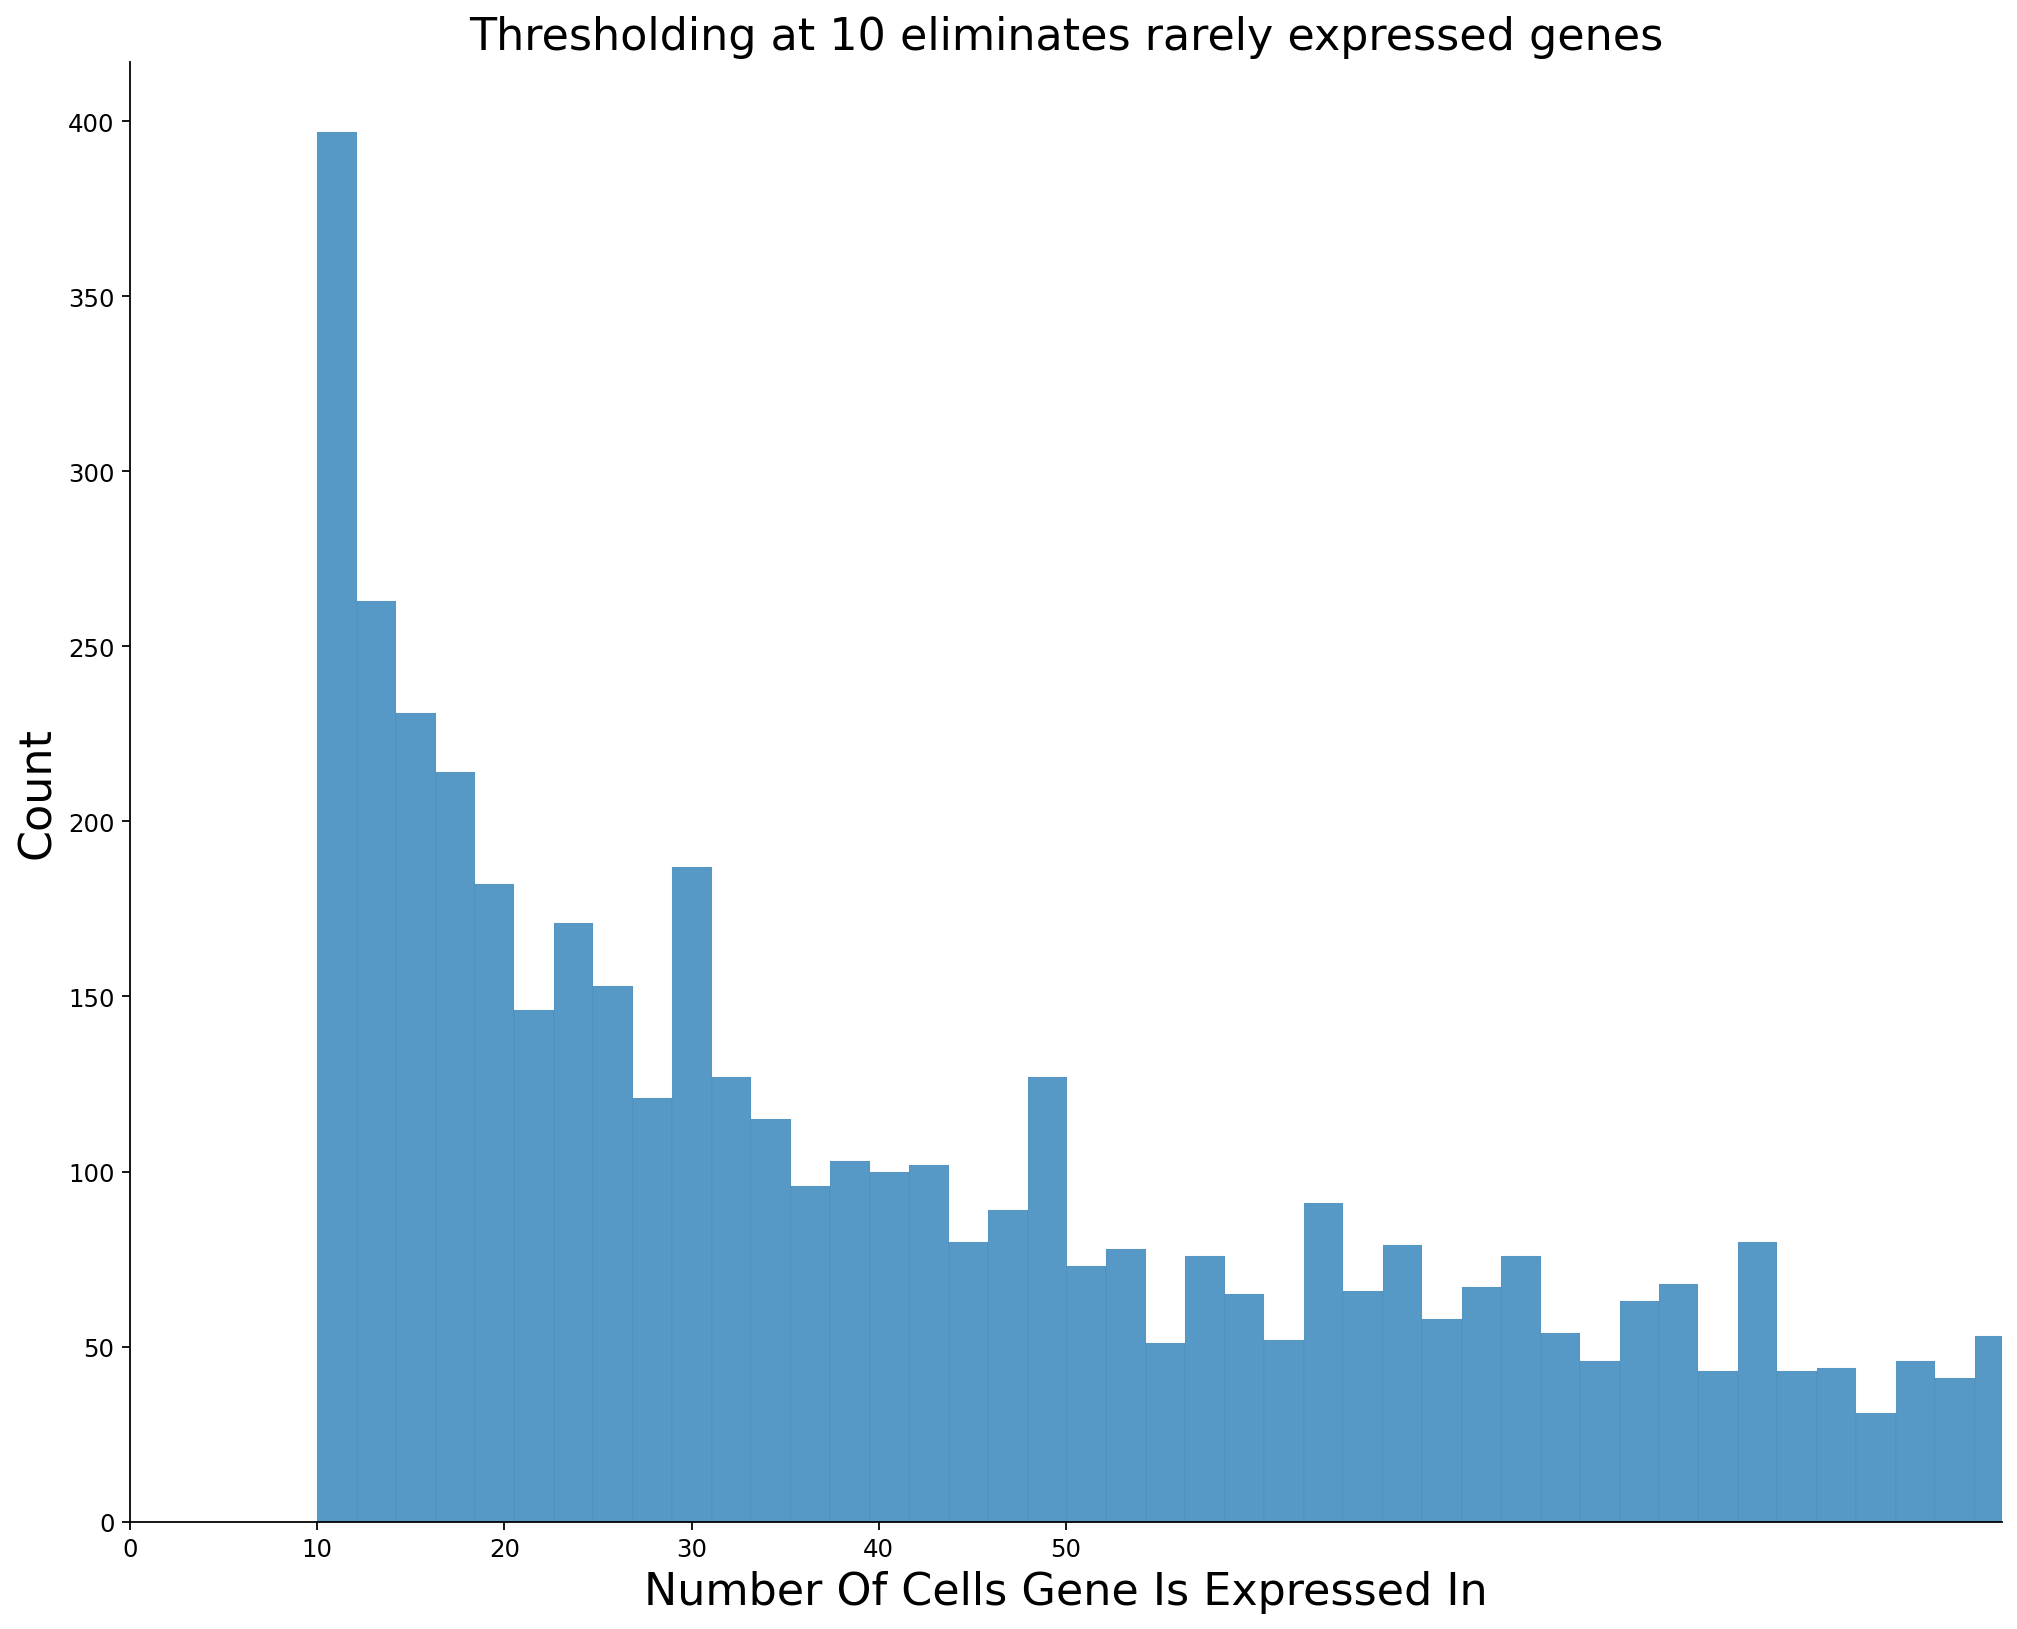

In [51]:

fig, ax = plt.subplots(figsize = (15,12))
fig.patch.set_facecolor('white')
ax = sns.histplot(data =maize_single_cell.var, x ='n_cells', bins =5000)
plt.ylabel("Count", fontsize = 20)
plt.xlabel("Number Of Cells Gene Is Expressed In", fontsize = 20)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
plt.xlim((0,100))
plt.title("Thresholding at 10 eliminates rarely expressed genes", fontsize = 20)
plt.xticks(fontsize = 11, ticks = [0,10,20,30,40,50])
plt.yticks(fontsize = 11)

In [57]:
maize_single_cell.var.index

Index(['GRMZM2G059865', 'GRMZM2G093344', 'GRMZM2G306216', 'GRMZM2G104572',
       'GRMZM5G822187', 'GRMZM2G023794', 'GRMZM2G471814', 'GRMZM2G330436',
       'GRMZM2G032104', 'GRMZM2G333069',
       ...
       'GRMZM2G104603', 'GRMZM2G062052', 'GRMZM2G363820', 'GRMZM2G005353',
       'GRMZM2G086541', 'GRMZM2G702529', 'GRMZM2G148509', 'GRMZM2G092607',
       'GRMZM5G804671', 'NDHK.1'],
      dtype='object', name='_index', length=26119)

In [ ]:
maize

In [5]:
maize_single_cell_dense = pd.DataFrame(index = maize_single_cell.obs.index, columns = maize_single_cell.var.index, data = maize_single_cell.X.todense())
maize_single_cell_dense

_index,GRMZM2G059865,GRMZM2G093344,GRMZM2G306216,GRMZM2G104572,GRMZM5G822187,GRMZM2G023794,GRMZM2G471814,GRMZM2G330436,GRMZM2G032104,GRMZM2G333069,...,GRMZM2G043300,GRMZM2G159559,GRMZM2G347322,GRMZM2G061499,GRMZM2G071924,GRMZM2G128549,GRMZM2G450231,GRMZM2G074773,GRMZM5G826672,GRMZM5G893089
AAACCCAAGAGTCACG-1_1,1.085746,0.399053,0.0,0.0,0.0,0.0,0.0,0.000000,0.683513,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCCACACTGGCCA-1_1,0.976166,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.976166,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACGAAAGTGCAAAT-1_1,0.516776,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.990111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACGAAGTATCGTGT-1_1,1.014930,0.000000,0.0,0.0,0.0,0.0,0.0,0.631051,0.000000,0.631051,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAAGAACAGGTGCTAG-1_1,0.588665,0.000000,0.0,0.0,0.0,0.0,0.0,0.428132,0.236805,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTCAAACGAGC-1_4,0.367643,0.000000,0.0,0.0,0.0,0.0,0.0,0.367643,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGGTTCAGTAGATA-1_4,0.370494,0.000000,0.0,0.0,0.0,0.0,0.0,0.370494,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGGTTTCGAGTCCG-1_4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGGTTTCGCTTTAT-1_4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.605682,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
maize_single_cell_dense.T

,AAACCCAAGAGTCACG-1_1,AAACCCACACTGGCCA-1_1,AAACGAAAGTGCAAAT-1_1,AAACGAAGTATCGTGT-1_1,AAAGAACAGGTGCTAG-1_1,AAAGAACGTTCGCGTG-1_1,AAAGAACTCTTACACT-1_1,AAAGGATCACTGCGAC-1_1,AAAGGATTCATGGGAG-1_1,AAAGGGCCAGGTGGAT-1_1,...,TTTGACTTCCTTATAC-1_4,TTTGATCAGCATCCCG-1_4,TTTGATCGTAGAAACT-1_4,TTTGATCGTAGTGATA-1_4,TTTGGAGTCTTGTGCC-1_4,TTTGGTTCAAACGAGC-1_4,TTTGGTTCAGTAGATA-1_4,TTTGGTTTCGAGTCCG-1_4,TTTGGTTTCGCTTTAT-1_4,TTTGTTGAGTGTTGTC-1_4
_index,,,,,,,,,,,,,,,,,,,,,
GRMZM2G059865,1.085746,0.976166,0.516776,1.01493,0.588665,0.219234,0.883206,0.906738,0.76145,0.503922,...,0.394907,0.157136,0.0,1.026224,0.409761,0.367643,0.370494,0.0,0.0,0.0
GRMZM2G093344,0.399053,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
GRMZM2G306216,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
GRMZM2G104572,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
GRMZM5G822187,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GRMZM2G128549,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
GRMZM2G450231,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
GRMZM2G074773,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [7]:
ultra_fast_corr = pd.DataFrame(np.corrcoef(maize_single_cell_dense.values, rowvar=False), columns=maize_single_cell_dense.columns)

/home/passala/miniconda3/envs/Single_cell_data/lib/python3.9/site-packages/numpy/lib/function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/passala/miniconda3/envs/Single_cell_data/lib/python3.9/site-packages/numpy/lib/function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [8]:
ultra_fast_corr = ultra_fast_corr.dropna(axis = 0, how = 'all')
ultra_fast_corr = ultra_fast_corr.dropna(axis = 1, how = 'all')
ultra_fast_corr

_index,GRMZM2G059865,GRMZM2G093344,GRMZM2G306216,GRMZM2G104572,GRMZM5G822187,GRMZM2G023794,GRMZM2G471814,GRMZM2G330436,GRMZM2G032104,GRMZM2G333069,...,GRMZM2G152857,GRMZM2G432846,GRMZM2G043300,GRMZM2G159559,GRMZM2G347322,GRMZM2G061499,GRMZM2G071924,GRMZM2G128549,GRMZM2G450231,GRMZM2G074773
0,1.000000,-0.017488,-0.020536,0.002412,0.010875,0.005277,-0.016552,-0.002723,0.025142,-0.036445,...,0.003206,-0.003722,-0.008061,0.001892,-0.007808,-0.006972,0.011019,0.007582,-0.007020,-0.000992
1,-0.017488,1.000000,-0.003046,0.045877,0.009169,0.002507,-0.000947,0.002212,-0.020017,-0.011080,...,-0.001737,-0.001737,0.012333,0.027192,-0.002363,0.020363,-0.003666,-0.002369,-0.003063,-0.002456
2,-0.020536,-0.003046,1.000000,0.011675,-0.003964,0.022276,-0.007224,-0.006415,0.033178,0.009185,...,-0.000899,-0.000899,-0.001221,-0.001271,-0.001224,-0.001970,-0.001898,-0.001227,-0.001586,-0.001272
3,0.002412,0.045877,0.011675,1.000000,-0.002184,-0.002709,-0.003980,0.018677,-0.002594,-0.003198,...,-0.000495,-0.000495,-0.000673,-0.000700,-0.000674,-0.001086,-0.001046,-0.000676,-0.000874,-0.000701
4,0.010875,0.009169,-0.003964,-0.002184,1.000000,0.008832,-0.003357,0.015609,0.014151,-0.005331,...,-0.000418,-0.000418,-0.000568,-0.000590,-0.000569,-0.000916,-0.000882,-0.000570,-0.000737,-0.000591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28485,-0.006972,0.020363,-0.001970,-0.001086,-0.000916,-0.002402,-0.001669,-0.001050,-0.005070,-0.005926,...,-0.000208,-0.000208,-0.000282,-0.000293,-0.000283,1.000000,-0.000438,-0.000283,-0.000366,-0.000294
28486,0.011019,-0.003666,-0.001898,-0.001046,-0.000882,-0.002314,-0.001608,-0.001816,-0.006544,-0.005710,...,-0.000200,-0.000200,-0.000272,-0.000283,-0.000272,-0.000438,1.000000,-0.000273,-0.000353,-0.000283
28487,0.007582,-0.002369,-0.001227,-0.000676,-0.000570,-0.001495,-0.001039,-0.002768,-0.004741,-0.003690,...,-0.000129,-0.000129,-0.000176,-0.000183,-0.000176,-0.000283,-0.000273,1.000000,-0.000228,-0.000183
28488,-0.007020,-0.003063,-0.001586,-0.000874,-0.000737,-0.001933,-0.001343,-0.003489,-0.008582,-0.002649,...,-0.000167,-0.000167,-0.000227,-0.000236,-0.000227,-0.000366,-0.000353,-0.000228,1.000000,-0.000236


In [52]:
all_cells_cells_correlation = sparse_corr(maize_single_cell.X)
all_cells_cells_correlation = pd.DataFrame(data = all_cells_cells_correlation, columns = maize_single_cell.var.index, index = maize_single_cell.var.index)
all_cells_cells_correlation


_index,GRMZM2G059865,GRMZM2G093344,GRMZM2G306216,GRMZM2G104572,GRMZM5G822187,GRMZM2G023794,GRMZM2G471814,GRMZM2G330436,GRMZM2G032104,GRMZM2G333069,...,GRMZM2G104603,GRMZM2G062052,GRMZM2G363820,GRMZM2G005353,GRMZM2G086541,GRMZM2G702529,GRMZM2G148509,GRMZM2G092607,GRMZM5G804671,NDHK.1
_index,,,,,,,,,,,,,,,,,,,,,
GRMZM2G059865,1.000000,-0.017488,-0.020536,0.002412,0.010875,0.005277,-0.016552,-0.002723,0.025142,-0.036445,...,-0.013828,-0.002834,-0.021328,0.002698,-0.007342,-0.006787,-0.005746,-0.005327,-0.003562,-0.001302
GRMZM2G093344,-0.017488,1.000000,-0.003046,0.045877,0.009169,0.002507,-0.000947,0.002212,-0.020017,-0.011080,...,-0.005029,0.016248,0.004426,-0.005838,-0.001128,-0.003958,-0.005115,-0.005505,-0.003644,-0.005871
GRMZM2G306216,-0.020536,-0.003046,1.000000,0.011675,-0.003964,0.022276,-0.007224,-0.006415,0.033178,0.009185,...,-0.002604,-0.002666,0.045381,-0.004059,-0.002985,-0.002715,-0.003134,-0.002850,-0.003114,-0.003040
GRMZM2G104572,0.002412,0.045877,0.011675,1.000000,-0.002184,-0.002709,-0.003980,0.018677,-0.002594,-0.003198,...,-0.001435,-0.001469,-0.001490,-0.002236,-0.001645,-0.001496,-0.001727,0.010930,-0.001716,-0.001675
GRMZM5G822187,0.010875,0.009169,-0.003964,-0.002184,1.000000,0.008832,-0.003357,0.015609,0.014151,-0.005331,...,-0.001210,-0.001239,-0.001257,-0.001886,-0.001387,-0.001262,-0.001457,-0.001325,-0.001447,-0.001413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GRMZM2G702529,-0.006787,-0.003958,-0.002715,-0.001496,-0.001262,0.008156,-0.002299,0.002633,-0.006030,-0.001612,...,-0.000829,0.008990,-0.000861,-0.001292,-0.000950,1.000000,-0.000998,-0.000907,0.030015,-0.000968
GRMZM2G148509,-0.005746,-0.005115,-0.003134,-0.001727,-0.001457,-0.003821,-0.002654,0.015582,0.001031,0.004380,...,0.191828,-0.000980,-0.000994,-0.001491,-0.001097,-0.000998,1.000000,-0.001047,-0.001144,-0.001117
GRMZM2G092607,-0.005327,-0.005505,-0.002850,0.010930,-0.001325,-0.003475,-0.002414,-0.011968,-0.014738,-0.001019,...,-0.000870,-0.000891,-0.000904,-0.001356,-0.000997,-0.000907,-0.001047,1.000000,-0.001040,-0.001016


In [53]:
all_cells_cells_correlation = all_cells_cells_correlation.replace(0,np.NaN)
all_cells_cells_correlation

_index,GRMZM2G059865,GRMZM2G093344,GRMZM2G306216,GRMZM2G104572,GRMZM5G822187,GRMZM2G023794,GRMZM2G471814,GRMZM2G330436,GRMZM2G032104,GRMZM2G333069,...,GRMZM2G104603,GRMZM2G062052,GRMZM2G363820,GRMZM2G005353,GRMZM2G086541,GRMZM2G702529,GRMZM2G148509,GRMZM2G092607,GRMZM5G804671,NDHK.1
_index,,,,,,,,,,,,,,,,,,,,,
GRMZM2G059865,1.000000,-0.017488,-0.020536,0.002412,0.010875,0.005277,-0.016552,-0.002723,0.025142,-0.036445,...,-0.013828,-0.002834,-0.021328,0.002698,-0.007342,-0.006787,-0.005746,-0.005327,-0.003562,-0.001302
GRMZM2G093344,-0.017488,1.000000,-0.003046,0.045877,0.009169,0.002507,-0.000947,0.002212,-0.020017,-0.011080,...,-0.005029,0.016248,0.004426,-0.005838,-0.001128,-0.003958,-0.005115,-0.005505,-0.003644,-0.005871
GRMZM2G306216,-0.020536,-0.003046,1.000000,0.011675,-0.003964,0.022276,-0.007224,-0.006415,0.033178,0.009185,...,-0.002604,-0.002666,0.045381,-0.004059,-0.002985,-0.002715,-0.003134,-0.002850,-0.003114,-0.003040
GRMZM2G104572,0.002412,0.045877,0.011675,1.000000,-0.002184,-0.002709,-0.003980,0.018677,-0.002594,-0.003198,...,-0.001435,-0.001469,-0.001490,-0.002236,-0.001645,-0.001496,-0.001727,0.010930,-0.001716,-0.001675
GRMZM5G822187,0.010875,0.009169,-0.003964,-0.002184,1.000000,0.008832,-0.003357,0.015609,0.014151,-0.005331,...,-0.001210,-0.001239,-0.001257,-0.001886,-0.001387,-0.001262,-0.001457,-0.001325,-0.001447,-0.001413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GRMZM2G702529,-0.006787,-0.003958,-0.002715,-0.001496,-0.001262,0.008156,-0.002299,0.002633,-0.006030,-0.001612,...,-0.000829,0.008990,-0.000861,-0.001292,-0.000950,1.000000,-0.000998,-0.000907,0.030015,-0.000968
GRMZM2G148509,-0.005746,-0.005115,-0.003134,-0.001727,-0.001457,-0.003821,-0.002654,0.015582,0.001031,0.004380,...,0.191828,-0.000980,-0.000994,-0.001491,-0.001097,-0.000998,1.000000,-0.001047,-0.001144,-0.001117
GRMZM2G092607,-0.005327,-0.005505,-0.002850,0.010930,-0.001325,-0.003475,-0.002414,-0.011968,-0.014738,-0.001019,...,-0.000870,-0.000891,-0.000904,-0.001356,-0.000997,-0.000907,-0.001047,1.000000,-0.001040,-0.001016


In [142]:

all_cells_cells_correlation = all_cells_cells_correlation.dropna(axis = 0, how = 'all')
all_cells_cells_correlation = all_cells_cells_correlation.dropna(axis = 1, how = 'all')
ranked_columns_all_cells = all_cells_cells_correlation.rank()
ranked_columns_all_cells

_index,GRMZM2G059865,GRMZM2G093344,GRMZM2G306216,GRMZM2G104572,GRMZM5G822187,GRMZM2G023794,GRMZM2G471814,GRMZM2G330436,GRMZM2G032104,GRMZM2G333069,...,GRMZM2G104603,GRMZM2G062052,GRMZM2G363820,GRMZM2G005353,GRMZM2G086541,GRMZM2G702529,GRMZM2G148509,GRMZM2G092607,GRMZM5G804671,NDHK.1
_index,,,,,,,,,,,,,,,,,,,,,
GRMZM2G059865,26119.0,696.0,2853.0,18449.0,22983.0,16988.0,1640.0,7137.0,19657.0,1597.0,...,1086.0,11993.0,63.0,19130.0,5229.0,5864.0,5250.0,6843.0,8168.0,16698.0
GRMZM2G093344,5870.0,26119.0,13201.0,26028.0,22398.0,15280.0,14504.0,10543.0,5529.0,5984.0,...,8914.0,24813.0,20671.0,7542.0,15695.0,9860.0,6067.0,6601.0,8028.0,7709.0
GRMZM2G306216,5070.0,9920.0,26119.0,22811.0,9832.0,23673.0,6487.0,4936.0,21212.0,16423.0,...,13264.0,12350.0,26012.0,10073.0,11001.0,12313.0,9203.0,10962.0,9077.0,12327.0
GRMZM2G104572,13474.0,26072.0,19988.0,26119.0,13366.0,11429.0,10277.0,21418.0,11110.0,10370.0,...,16376.0,15514.0,14983.0,13591.0,14070.0,15505.0,12651.0,22753.0,12497.0,15501.0
GRMZM5G822187,16425.0,19934.0,11917.0,13789.0,26119.0,18951.0,11227.0,19845.0,16964.0,9180.0,...,17154.0,16317.0,15757.0,14460.0,14817.0,16313.0,13473.0,14986.0,13380.0,16326.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GRMZM2G702529,9703.0,9041.0,13699.0,15559.0,15993.0,18601.0,13172.0,10851.0,9877.0,11265.0,...,18719.0,23113.0,17320.0,16206.0,16371.0,26119.0,15149.0,16603.0,25813.0,17955.0
GRMZM2G148509,10126.0,7913.0,13058.0,14921.0,15383.0,10038.0,12450.0,19834.0,12488.0,14239.0,...,26117.0,17343.0,16760.0,15584.0,15810.0,17322.0,26119.0,16020.0,14493.0,17373.0
GRMZM2G092607,10324.0,7445.0,13491.0,22544.0,15796.0,10549.0,12941.0,2502.0,6911.0,11567.0,...,18546.0,17717.0,17142.0,15998.0,16194.0,17712.0,14961.0,26119.0,14904.0,17773.0


In [143]:
double_ranked_all_cells = ranked_columns_all_cells.rank(axis = 1)
double_ranked_all_cells 

_index,GRMZM2G059865,GRMZM2G093344,GRMZM2G306216,GRMZM2G104572,GRMZM5G822187,GRMZM2G023794,GRMZM2G471814,GRMZM2G330436,GRMZM2G032104,GRMZM2G333069,...,GRMZM2G104603,GRMZM2G062052,GRMZM2G363820,GRMZM2G005353,GRMZM2G086541,GRMZM2G702529,GRMZM2G148509,GRMZM2G092607,GRMZM5G804671,NDHK.1
_index,,,,,,,,,,,,,,,,,,,,,
GRMZM2G059865,26119.0,1145.5,5780.5,15976.0,19945.0,14962.0,3628.5,9599.0,16941.0,3542.5,...,2255.0,12169.5,54.5,16522.5,8289.0,8751.0,8307.0,9429.0,10175.0,14750.5
GRMZM2G093344,3617.0,26119.0,13970.0,26099.5,24701.5,17188.5,15991.0,9864.0,3210.0,3769.5,...,7639.5,25704.0,23542.0,5864.0,17860.0,8957.5,3886.0,4567.5,6493.0,6081.0
GRMZM2G306216,5506.5,12724.5,26119.0,24160.0,12602.0,24885.0,7835.0,5274.0,22506.0,18423.5,...,16175.5,15461.0,26039.5,12924.5,14091.0,15431.0,11735.5,14042.0,11565.5,15442.5
GRMZM2G104572,17410.5,26079.5,24015.5,26119.0,17217.5,13521.5,11333.5,24811.0,12919.5,11519.5,...,21198.0,20315.5,19713.5,17621.0,18432.0,20307.0,15817.5,25255.5,15553.0,20302.5
GRMZM5G822187,21728.5,24248.5,13941.0,17788.0,26119.0,23657.5,12483.0,24202.0,22227.0,8285.0,...,22397.0,21635.0,20998.0,19057.5,19694.5,21628.5,17175.0,19961.0,16992.0,21649.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GRMZM2G702529,9304.5,8041.0,17312.0,20671.0,21397.5,24004.0,16340.5,11655.0,9675.5,12468.0,...,24052.0,25529.0,23063.0,21703.5,21963.0,26119.0,19984.0,22267.0,26006.0,23567.5
GRMZM2G148509,7857.0,3970.5,14453.5,18632.0,19627.0,7653.5,13015.0,24419.0,13106.5,17106.5,...,26117.0,22542.0,21852.0,20035.5,20463.0,22525.0,26119.0,20818.0,17679.0,22577.0
GRMZM2G092607,9270.5,4107.0,15916.0,25253.5,20624.5,9715.0,14769.5,86.0,3403.0,11781.5,...,23646.0,23076.5,22536.0,20955.0,21297.0,23072.0,18964.5,26119.0,18842.5,23119.5


In [144]:
normalized_all_cells = double_ranked_all_cells/26119
normalized_all_cells

_index,GRMZM2G059865,GRMZM2G093344,GRMZM2G306216,GRMZM2G104572,GRMZM5G822187,GRMZM2G023794,GRMZM2G471814,GRMZM2G330436,GRMZM2G032104,GRMZM2G333069,...,GRMZM2G104603,GRMZM2G062052,GRMZM2G363820,GRMZM2G005353,GRMZM2G086541,GRMZM2G702529,GRMZM2G148509,GRMZM2G092607,GRMZM5G804671,NDHK.1
_index,,,,,,,,,,,,,,,,,,,,,
GRMZM2G059865,1.000000,0.043857,0.221314,0.611662,0.763620,0.572840,0.138922,0.367510,0.648608,0.135629,...,0.086336,0.465925,0.002087,0.632585,0.317355,0.335043,0.318044,0.361002,0.389563,0.564742
GRMZM2G093344,0.138482,1.000000,0.534860,0.999253,0.945729,0.658084,0.612236,0.377656,0.122899,0.144320,...,0.292488,0.984111,0.901336,0.224511,0.683793,0.342950,0.148781,0.174873,0.248593,0.232819
GRMZM2G306216,0.210824,0.487174,1.000000,0.924997,0.482484,0.952755,0.299973,0.201922,0.861672,0.705368,...,0.619300,0.591945,0.996956,0.494831,0.539492,0.590796,0.449309,0.537616,0.442800,0.591236
GRMZM2G104572,0.666584,0.998488,0.919465,1.000000,0.659194,0.517688,0.433918,0.949922,0.494640,0.441039,...,0.811593,0.777805,0.754757,0.674643,0.705693,0.777480,0.605594,0.966940,0.595467,0.777308
GRMZM5G822187,0.831904,0.928385,0.533749,0.681037,1.000000,0.905758,0.477928,0.926605,0.850990,0.317202,...,0.857498,0.828324,0.803936,0.729641,0.754030,0.828075,0.657567,0.764233,0.650561,0.828879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GRMZM2G702529,0.356235,0.307860,0.662813,0.791416,0.819231,0.919024,0.625617,0.446227,0.370439,0.477354,...,0.920862,0.977411,0.882997,0.830947,0.840882,1.000000,0.765114,0.852521,0.995674,0.902312
GRMZM2G148509,0.300815,0.152016,0.553371,0.713350,0.751445,0.293024,0.498296,0.934913,0.501799,0.654945,...,0.999923,0.863050,0.836632,0.767085,0.783453,0.862399,1.000000,0.797044,0.676864,0.864390
GRMZM2G092607,0.354933,0.157242,0.609365,0.966863,0.789636,0.371951,0.565470,0.003293,0.130288,0.451070,...,0.905318,0.883514,0.862820,0.802290,0.815383,0.883342,0.726081,1.000000,0.721410,0.885160


In [ ]:
#normalized_all_cells.to_csv('/home/passala/Gene_duplication_project/Code/Jack_Dave_maize_project/Files_for_Jack_correlation/dropped_low_expression_genes_normalized_corexpresion_ranks_in_all_cells.csv')

In [145]:
all_cells_results = normalized_all_cells.loc[normalized_all_cells.index =='GRMZM2G047448'].squeeze()

In [146]:
all_cells_results[list_of_PFKB_genes_in_maize]

_index
GRMZM2G051842    0.567633
GRMZM2G171400    0.801141
GRMZM2G007630    0.721352
GRMZM2G178346    0.247176
GRMZM2G121128    0.546346
GRMZM2G132607    0.112428
GRMZM2G132623    0.726234
Name: GRMZM2G047448, dtype: float64

In [147]:
all_cells_results[list_of_ADK_genes_in_maize]

_index
GRMZM2G540538    0.103201
GRMZM2G135132    0.608637
GRMZM2G003775    0.517037
GRMZM2G089767    0.917723
Name: GRMZM2G047448, dtype: float64

In [148]:
clevata_7_maize_results = normalized_all_cells.loc[normalized_all_cells.index =='GRMZM2G372364'].squeeze()

In [149]:
clevata_7_maize_results.value_counts()

0.999158    19
0.056932    17
0.061545    16
0.046824    15
0.040832    14
            ..
0.596309     1
0.970060     1
0.736935     1
0.730464     1
0.499177     1
Name: GRMZM2G372364, Length: 13442, dtype: int64

In [150]:
clevata_7_maize_results[list_of_PFKB_genes_in_maize]

_index
GRMZM2G051842    0.832095
GRMZM2G171400    0.938704
GRMZM2G007630    0.462345
GRMZM2G178346    0.825721
GRMZM2G121128    0.537310
GRMZM2G132607    0.377924
GRMZM2G132623    0.370516
Name: GRMZM2G372364, dtype: float64

In [152]:
clevata_7_maize_results[list_of_ADK_genes_in_maize]

_index
GRMZM2G540538    0.910046
GRMZM2G135132    0.238734
GRMZM2G003775    0.426107
GRMZM2G089767    0.697615
Name: GRMZM2G372364, dtype: float64

In [151]:
clevata_7_maize_results[['GRMZM2G540538','GRMZM2G135132','GRMZM2G089767']]

_index
GRMZM2G540538    0.910046
GRMZM2G135132    0.238734
GRMZM2G089767    0.697615
Name: GRMZM2G372364, dtype: float64

In [ ]:
import CococoNet_reader

In [ ]:
maize_cococonet = CococoNet_reader.read_cococonet('maize')
arabi_cococonet = CococoNet_reader.read_cococonet('arabidopsis')


In [ ]:
egad_df = pd.DataFrame(index = maize_cococonet.index, columns = ['ADK','PFKB'], data = 0)
egad_df

In [ ]:
v4_adk_genes = ['Zm00001d017271','Zm00001d051157','Zm00001d003017']
v4_pfkb_genes = ['Zm00001d008406','Zm00001d040183','Zm00001d011526','Zm00001d030048','Zm00001d031429']

In [ ]:
egad_df.loc[egad_df.index.isin()

In [ ]:
egad_df['ADK'].loc[egad_df.index.isin(v4_adk_genes)] = 1 
egad_df['PFKB'].loc[egad_df.index.isin(v4_pfkb_genes)] = 1
egad_df.sum() 


In [ ]:
import numpy as np
import pandas as pd
from scipy import stats, sparse
import bottleneck


def run_egad(go, nw, **kwargs):
    """EGAD running function
    
    Wrapper to lower level functions for EGAD

    EGAD measures modularity of gene lists in co-expression networks. 

    This was translated from the MATLAB version, which does tiled Cross Validation
    
    The useful kwargs are:
    int - nFold : Number of CV folds to do, default is 3, 
    int - {min,max}_count : limits for number of terms in each gene list, these are exclusive values


    Arguments:
        go {pd.DataFrame} -- dataframe of genes x terms of values [0,1], where 1 is included in gene lists
        nw {pd.DataFrame} -- dataframe of co-expression network, genes x genes
        **kwargs 
    
    Returns:
        pd.DataFrame -- dataframe of terms x metrics where the metrics are 
        ['AUC', 'AVG_NODE_DEGREE', 'DEGREE_NULL_AUC', 'P_Value']
    """
    assert nw.shape[0] == nw.shape[1] , 'Network is not square'
    assert np.all(nw.index == nw.columns) , 'Network index and columns are not in the same order'
    nw_mask = nw.isna().sum(axis=1) != nw.shape[1]
    nw = nw.loc[nw_mask, nw_mask].astype(float)
    np.fill_diagonal(nw.values, 1)
    return _runNV(go, nw, **kwargs)


def _runNV(go, nw, nFold=3, min_count=20, max_count=1000):

    #Make sure genes are same in go and nw
    genes_intersect = go.index.intersection(nw.index)

    go = go.loc[genes_intersect, :]
    nw = nw.loc[genes_intersect, genes_intersect]

    #Make sure there aren't duplicates
    duplicates = nw.index.duplicated(keep='first')
    nw = nw.loc[~duplicates, ~duplicates]

    go = go.loc[:, (go.sum(axis=0) > min_count) & (go.sum(axis=0) < max_count)]
    go = go.loc[~go.index.duplicated(keep='first'), :]

    roc = _new_egad(go.values, nw.values, nFold)

    col_names = ['AUC', 'AVG_NODE_DEGREE', 'DEGREE_NULL_AUC', 'P_Value']
    #Put output in dataframe
    return pd.DataFrame(dict(zip(col_names, roc)), index=go.columns)


def _new_egad(go, nw, nFold):

    #Build Cross validated Positive
    x, y = np.where(go)
    cvgo = {}
    for i in np.arange(nFold):
        a = x[i::nFold]
        b = y[i::nFold]
        dat = np.ones_like(a)
        mask = sparse.coo_matrix((dat, (a, b)), shape=go.shape)
        cvgo[i] = go - mask.toarray()
        
    CVgo = np.concatenate(list(cvgo.values()), axis=1)

    sumin = np.matmul(nw.T, CVgo)

    degree = np.sum(nw, axis=0)

    predicts = sumin / degree[:, None]

    np.place(predicts, CVgo > 0, np.nan)

    #Calculate ranks of positives
    rank_abs = lambda x: stats.rankdata(np.abs(x))
    predicts2 = np.apply_along_axis(rank_abs, 0, predicts)

    #Masking Nans that were ranked (how tiedrank works in matlab)
    predicts2[np.isnan(predicts)] = np.nan

    filtering = np.tile(go, nFold)

    #negatives :filtering == 0
    #Sets Ranks of negatives to 0
    np.place(predicts2, filtering == 0, 0)

    #Sum of ranks for each prediction
    p = bottleneck.nansum(predicts2, axis=0)

    #Number of predictions
    #Number of 1's masked for each GO term for each CV
    n_p = np.sum(filtering, axis=0) - np.sum(CVgo, axis=0)

    #Number of negatives
    #Number of GO terms - number of postiive
    n_n = filtering.shape[0] - np.sum(filtering, axis=0)

    roc = (p / n_p - (n_p + 1) / 2) / n_n
    U = roc * n_p * n_n
    Z = (np.abs(U - (n_p * n_n / 2))) / np.sqrt(n_p * n_n *
                                                (n_p + n_n + 1) / 12)
    roc = roc.reshape(nFold, go.shape[1])
    Z = Z.reshape(nFold, go.shape[1])
    #Stouffer Z method
    Z = bottleneck.nansum(Z, axis=0) / np.sqrt(nFold)
    #Calc ROC of Neighbor Voting
    roc = bottleneck.nanmean(roc, axis=0)
    P = stats.norm.sf(Z)

    #Average degree for nodes in each go term
    avg_degree = degree.dot(go) / np.sum(go, axis=0)

    #Calc null auc for degree
    ranks = np.tile(stats.rankdata(degree), (go.shape[1], 1)).T

    np.place(ranks, go == 0, 0)

    n_p = bottleneck.nansum(go, axis=0)
    nn = go.shape[0] - n_p
    p = bottleneck.nansum(ranks, axis=0)

    roc_null = (p / n_p - ((n_p + 1) / 2)) / nn

    return roc, avg_degree, roc_null, P


In [ ]:
run_egad(egad_df,maize_cococonet, min_count = 1)

In [ ]:
correlation_results_wuschel_expressing_cells_wuschel_coexpression[['GRMZM2G051842',
 'GRMZM2G171400',
 'GRMZM2G178346',
 'GRMZM2G121128',
 'GRMZM2G132623']]

In [ ]:
list_of_ADK_genes_in_maize

In [ ]:
correlation_results_wuschel_expressing_cells_wuschel_coexpression[['GRMZM2G540538', 'GRMZM2G135132']]

In [ ]:
cells_without_wuschel.mean(axis =0)[list_of_ADK_genes_in_maize]

In [ ]:
maize_single_cell_wuschel_expressing_pd.mean(axis =0)[['GRMZM2G540538', 'GRMZM2G135132']]

In [ ]:
maize_single_cell_wuschel_expressing_pd.sem(axis =0)[['GRMZM2G540538', 'GRMZM2G135132']]

In [ ]:
adk_wuschel_gene_expression = pd.DataFrame(data = maize_single_cell_wuschel_expressing_pd.median(axis =0)[['GRMZM2G540538', 'GRMZM2G135132']], columns = ['Mean Expression'])
adk_wuschel_gene_expression['Wuschel Expressing Cells'] = 'Yes'
adk_wuschel_gene_expression = adk_wuschel_gene_expression.reset_index().rename(columns = {'index':'Gene'})
adk_wuschel_gene_expression

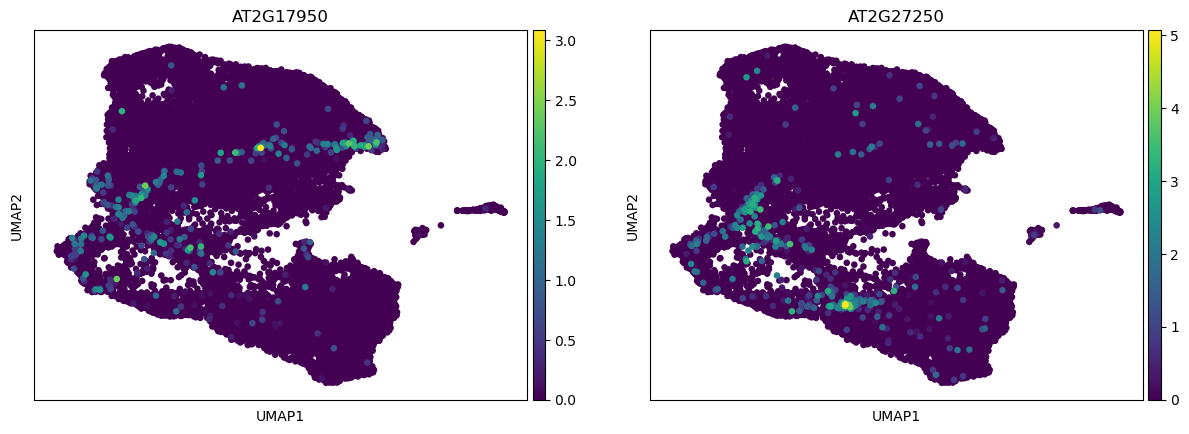

In [39]:
sc.pl.umap(arabi_single_cell, color=['AT2G17950','AT2G27250'], use_raw= False, s = 90) ### Wuschel, CLevata 3

In [153]:
arabi_single_cell_trimmed_to_wuschel_expressing_genes = arabi_single_cell[(arabi_single_cell[:,'AT2G17950'].X>0), : ]
arabi_single_cell_non_wuschel_expressing_cells = arabi_single_cell[(arabi_single_cell[:,'AT2G17950'].X==0), :]

/home/passala/miniconda3/envs/Single_cell_data/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3398: SparseEfficiencyWarning: Comparing a sparse matrix with 0 using == is inefficient, try using != instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [154]:
# arabi_single_cell_trimmed_to_wuschel_expressing_genes_densified  = arabi_single_cell_trimmed_to_wuschel_expressing_genes.X.todense()
# arabi_single_cell_trimmed_to_wuschel_expressing_genes_densified[arabi_single_cell_trimmed_to_wuschel_expressing_genes_densified <.2] = 0
# arabi_single_cell_trimmed_to_wuschel_expressing_genes.X = arabi_single_cell_trimmed_to_wuschel_expressing_genes_densified

In [155]:
sc.pp.filter_genes(data = arabi_single_cell_trimmed_to_wuschel_expressing_genes,min_cells = 10)
arabi_single_cell_trimmed_to_wuschel_expressing_genes

filtered out 7302 genes that are detected in less than 10 cells


/home/passala/miniconda3/envs/Single_cell_data/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/home/passala/miniconda3/envs/Single_cell_data/lib/python3.9/contextlib.py:126: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)


AnnData object with n_obs × n_vars = 315 × 16037
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'RNA_snn_res.0.5', 'seurat_clusters', 'source', 'integrated_snn_res.0.5', 'integrated_snn_res.0.75', 'integrated_snn_res.1', 'integrated_snn_res.1.2', 'integrated_snn_res.1.5', 'integrated_snn_res.2', 'integrated_snn_res.0.45', 'integrated_snn_res.0.25', 'integrated_snn_res.0.7', 'integrated_snn_res.0.8', 'integrated_snn_res.0.65', 'integrated_snn_res.0.6', 'integrated_snn_res.0.55', 'integrated_snn_res.0.53', 'integrated_snn_res.0.52', 'integrated_snn_res.0.54'
    var: 'features', 'n_cells'
    obsm: 'X_umap'

ValueError: Could not interpret value `n_genes` for parameter `x`

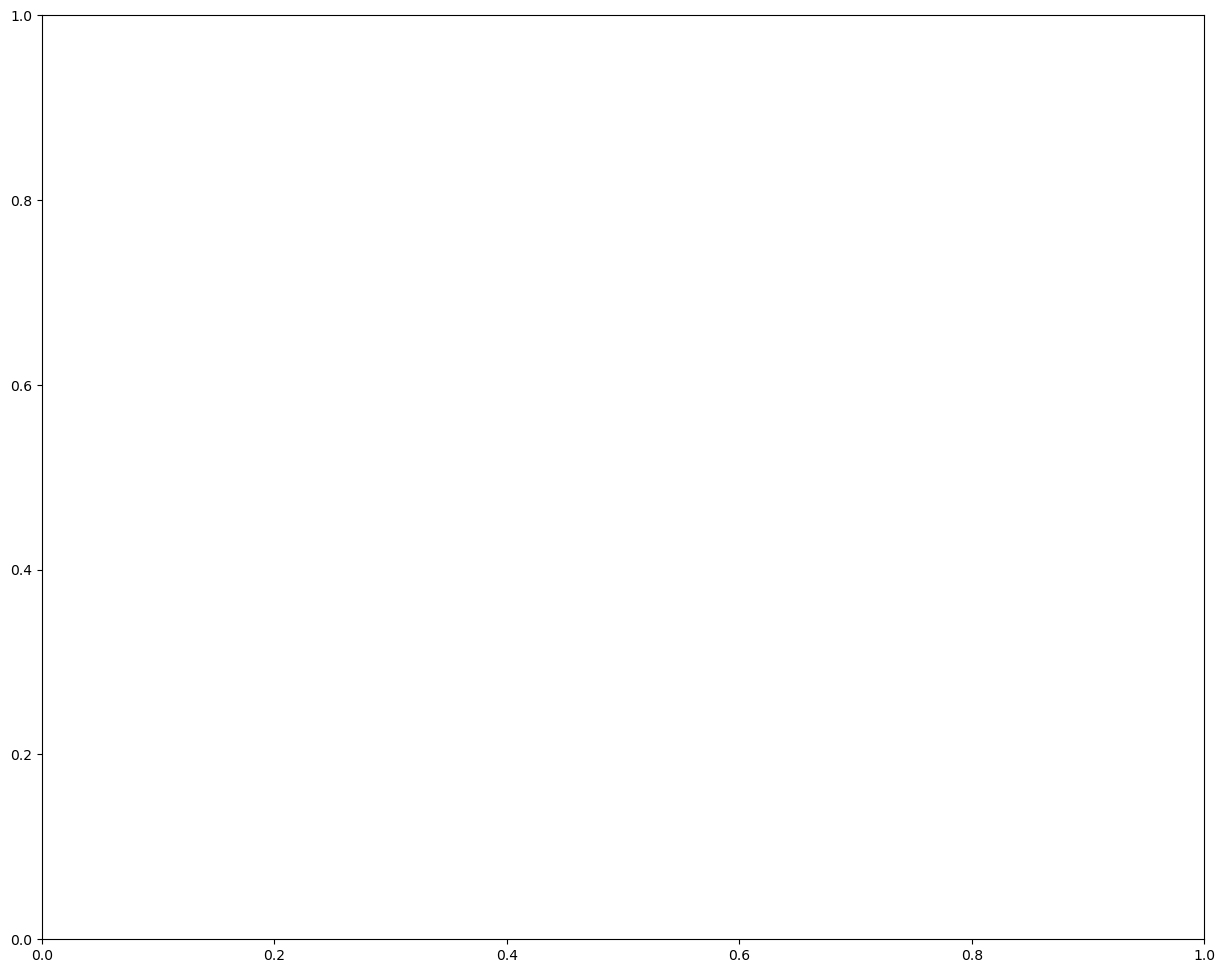

In [43]:

fig, ax = plt.subplots(figsize = (15,12))
fig.patch.set_facecolor('white')
ax = sns.histplot(data =arabi_single_cell_trimmed_to_wuschel_expressing_genes.obs, x ='n_genes',)
plt.ylabel("Count", fontsize = 20)
plt.xlabel("Number Of Cells Gene Is Expressed In", fontsize = 20)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
#plt.xlim((0,100))
plt.title("Thresholding at 10 eliminates rarely expressed genes", fontsize = 20)
#plt.xticks(fontsize = 11, ticks = [0,10,20,30,40,50])
#plt.yticks(fontsize = 11)

In [156]:
sc.pp.filter_genes(data = arabi_single_cell_non_wuschel_expressing_cells,min_cells = 10)
arabi_single_cell_non_wuschel_expressing_cells

filtered out 2189 genes that are detected in less than 10 cells


/home/passala/miniconda3/envs/Single_cell_data/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/home/passala/miniconda3/envs/Single_cell_data/lib/python3.9/contextlib.py:126: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)


AnnData object with n_obs × n_vars = 19909 × 21150
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'RNA_snn_res.0.5', 'seurat_clusters', 'source', 'integrated_snn_res.0.5', 'integrated_snn_res.0.75', 'integrated_snn_res.1', 'integrated_snn_res.1.2', 'integrated_snn_res.1.5', 'integrated_snn_res.2', 'integrated_snn_res.0.45', 'integrated_snn_res.0.25', 'integrated_snn_res.0.7', 'integrated_snn_res.0.8', 'integrated_snn_res.0.65', 'integrated_snn_res.0.6', 'integrated_snn_res.0.55', 'integrated_snn_res.0.53', 'integrated_snn_res.0.52', 'integrated_snn_res.0.54'
    var: 'features', 'n_cells'
    obsm: 'X_umap'

In [45]:

# fig, ax = plt.subplots(figsize = (15,12))
# fig.patch.set_facecolor('white')
# ax = sns.histplot(data =arabi_single_cell_non_wuschel_expressing_cells.var, x ='n_cells', bins =500)
# plt.ylabel("Count", fontsize = 20)
# plt.xlabel("Number Of Cells Gene Is Expressed In", fontsize = 20)
# sns.despine()

# ax.grid(False)
# ax.spines["bottom"].set_color("black")
# ax.spines["left"].set_color("black")
# plt.xlim((0,100))
# plt.title("Thresholding at 10 eliminates rarely expressed genes", fontsize = 20)
# plt.xticks(fontsize = 11, ticks = [0,10,20,30,40,50])
# plt.yticks(fontsize = 11)

In [46]:
arabi_single_cell_wuschel_expressing_pd = pd.DataFrame(data = arabi_single_cell_trimmed_to_wuschel_expressing_genes.X.todense(), columns = arabi_single_cell_trimmed_to_wuschel_expressing_genes.var.index, index = arabi_single_cell_trimmed_to_wuschel_expressing_genes.obs.index)
arabi_single_cell_wuschel_expressing_pd

_index,AT1G01010,AT1G01020,AT1G01040,AT1G01050,AT1G01060,AT1G01080,AT1G01090,AT1G01100,AT1G01110,AT1G01120,...,ATCG01050,ATCG01070,ATCG01080,ATCG01090,ATCG01100,ATCG01110,ATCG01120,ATCG01130,ATMG01390,ATMG00020
AAAGGATAGTCAGGGT-1_1,0.0,0.000000,0.000000,0.475368,0.000000,0.000000,0.000000,3.104640,0.000000,0.000000,...,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.000000,1.038797,0.0,0.000000
AAAGGGCGTGTCTAAC-1_1,0.0,0.000000,0.000000,1.510271,0.000000,0.000000,1.510271,2.925299,0.000000,0.000000,...,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.000000,1.839269,0.0,0.000000
AACCATGGTTGCCAAT-1_1,0.0,0.229670,0.327343,0.643771,0.000000,0.000000,0.327343,2.471800,0.229670,1.161452,...,0.828954,0.00000,0.0,0.327343,0.0,0.0,0.121414,2.677913,0.0,0.643771
AACCTGAAGTATCCTG-1_1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.812252,3.260383,0.000000,0.000000,...,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000
AACGGGACAGCCGTTG-1_1,0.0,0.000000,0.000000,1.010743,0.000000,0.000000,1.503028,2.763481,0.000000,0.000000,...,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.000000,2.441115,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTCCGTGAGCCAACCC-1_2,0.0,0.413100,0.227731,1.194447,0.227731,0.227731,0.929991,2.778144,0.000000,0.000000,...,0.000000,0.00000,0.0,0.413100,0.0,0.0,0.227731,2.067520,0.0,0.569421
TTCCTAAAGCTAATCC-1_2,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.759699,0.000000,0.908060,...,0.000000,0.90806,0.0,0.000000,0.0,0.0,0.000000,1.934132,0.0,0.908060
TTGGTTTGTGGAGAAA-1_2,0.0,0.487269,0.487269,0.000000,0.487269,0.000000,0.813473,2.776876,0.487269,0.000000,...,0.487269,0.00000,0.0,0.000000,0.0,0.0,0.000000,3.078212,0.0,0.487269
TTGGTTTTCGAATGCT-1_2,0.0,0.000000,0.000000,0.634195,0.000000,0.000000,0.000000,2.775931,0.000000,0.000000,...,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.000000,2.287983,0.0,0.000000


In [79]:
arabi_single_cell_wuschel_expressing_pd.columns[0]

'AT1G01010'

In [90]:
list_of_correlations = []
for target_gene in arabi_single_cell_wuschel_expressing_pd.columns:
    series_for_current_Gene = arabi_single_cell_wuschel_expressing_pd[target_gene]
    series_for_all_other_genes = avg_of_all_other_genes_expression = arabi_single_cell_wuschel_expressing_pd.drop(columns= target_gene).mean(axis = 1)
    current_correlation = stats.spearmanr(series_for_current_Gene, series_for_all_other_genes)
    list_of_correlations.append(current_correlation[0])

In [91]:
list_of_correlations[1]

0.3297433006914861

In [92]:
pd_of_gene_correaltions = pd.DataFrame(index = arabi_single_cell_wuschel_expressing_pd.columns, data = list_of_correlations, columns  = ['Coexpression Score Vs All Other Genes'])


In [93]:
pd_of_gene_correaltions.rank().loc['AT2G17950']

Coexpression Score Vs All Other Genes    1.0
Name: AT2G17950, dtype: float64

Text(0.5, 1.0, ' Expression in ~300 Wuschel Expressing Cells')

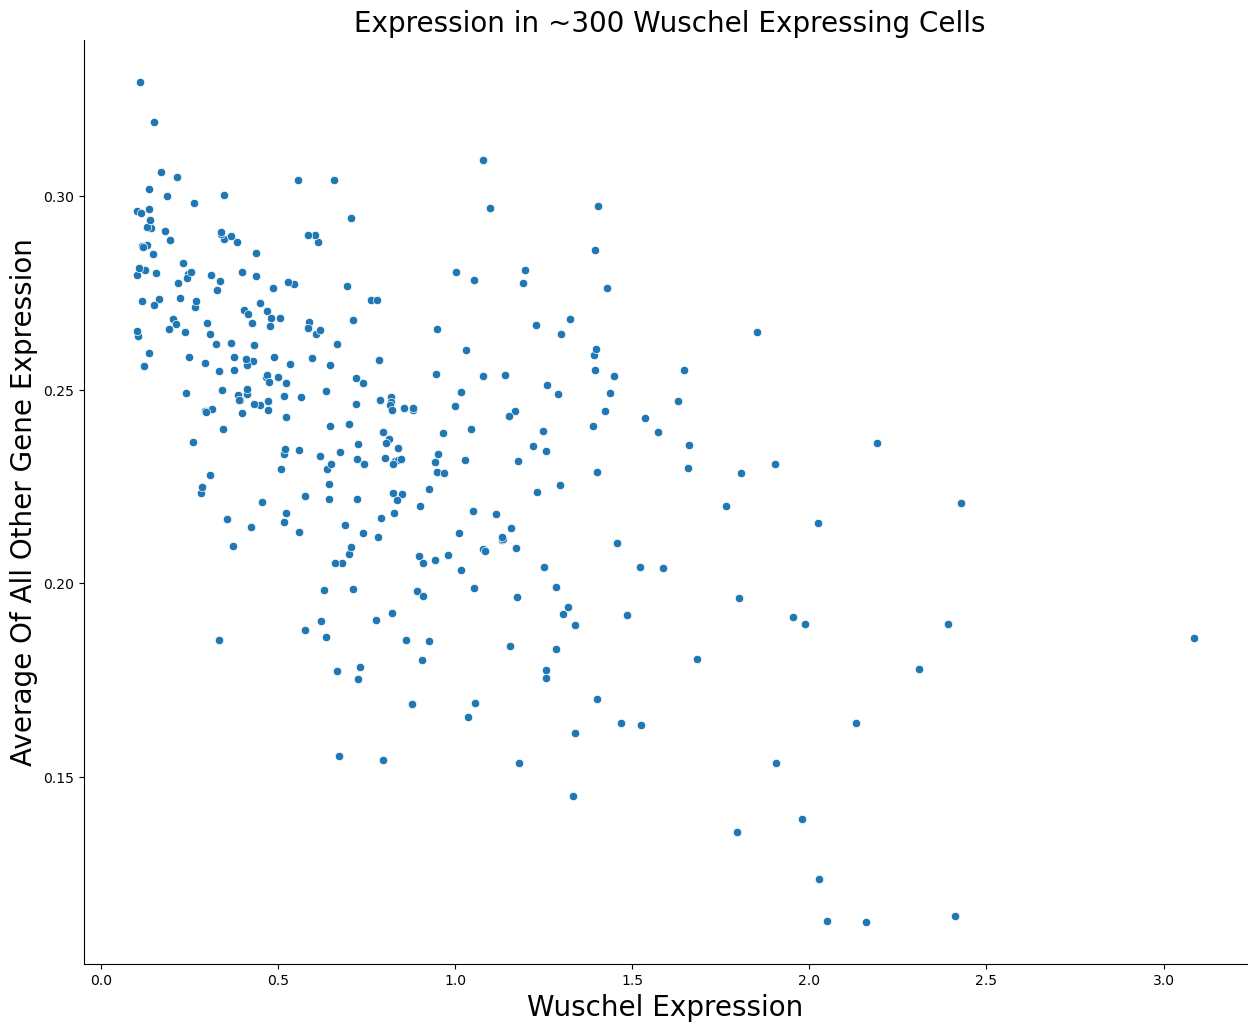

In [75]:
wuschel_only_series = arabi_single_cell_wuschel_expressing_pd['AT2G17950']

avg_of_all_other_genes_expression = arabi_single_cell_wuschel_expressing_pd.drop(columns= 'AT2G17950').mean(axis = 1)
fig, ax = plt.subplots(figsize = (15,12))
fig.patch.set_facecolor('white')
ax = sns.scatterplot(x = wuschel_only_series, y = avg_of_all_other_genes_expression)
plt.ylabel("Average Of All Other Gene Expression", fontsize = 20)
plt.xlabel("Wuschel Expression", fontsize = 20)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
#plt.xlim((0,100))
plt.title(" Expression in ~300 Wuschel Expressing Cells", fontsize = 20)
#plt.xticks(fontsize = 11, ticks = [0,10,20,30,40,50])
#plt.yticks(fontsize = 11)

In [47]:
#arabi_single_cell_wuschel_expressing_pd = arabi_single_cell_wuschel_expressing_pd.replace(0,np.nan)

In [48]:
arabi_single_cellwuschel_expressing_cells_correlation = arabi_single_cell_wuschel_expressing_pd.corr(method = 'spearman')
arabi_tester_keep_seperate = arabi_single_cellwuschel_expressing_cells_correlation
arabi_single_cellwuschel_expressing_cells_correlation = arabi_single_cellwuschel_expressing_cells_correlation.abs()
arabi_single_cellwuschel_expressing_cells_correlation = arabi_single_cellwuschel_expressing_cells_correlation.dropna(axis = 0, how = 'all')
arabi_single_cellwuschel_expressing_cells_correlation = arabi_single_cellwuschel_expressing_cells_correlation.dropna(axis = 1, how = 'all')
arabi_ranked_columns_wuschel = arabi_single_cellwuschel_expressing_cells_correlation.rank()
arabi_ranked_columns_wuschel

_index,AT1G01010,AT1G01020,AT1G01040,AT1G01050,AT1G01060,AT1G01080,AT1G01090,AT1G01100,AT1G01110,AT1G01120,...,ATCG01050,ATCG01070,ATCG01080,ATCG01090,ATCG01100,ATCG01110,ATCG01120,ATCG01130,ATMG01390,ATMG00020
_index,,,,,,,,,,,,,,,,,,,,,
AT1G01010,16037.0,1454.0,4181.0,4188.0,3417.0,3661.0,1184.0,12337.0,2280.0,3971.0,...,11888.0,2221.0,12817.0,5531.0,6256.0,16014.0,12472.0,14080.0,15851.0,3246.0
AT1G01020,3505.0,16037.0,12395.0,10063.0,15549.0,4856.0,12555.0,8216.0,14566.0,7095.0,...,12583.0,2954.0,12747.0,8827.0,11526.0,11267.0,1446.0,12756.0,3967.0,7221.0
AT1G01040,10099.0,13588.0,16037.0,14522.0,13821.0,6144.0,5378.0,2674.0,12584.0,15181.0,...,13603.0,15118.0,10562.0,15420.0,6576.0,13259.0,12337.0,14476.0,13354.0,15661.0
AT1G01050,5534.0,6681.0,10379.0,16037.0,6725.0,13232.0,1570.0,12360.0,5671.0,3622.0,...,5351.0,11331.0,1443.0,4590.0,2975.0,3460.0,4874.0,1649.0,5573.0,9860.0
AT1G01060,8498.0,15949.0,14500.0,12014.0,16037.0,5745.0,9998.0,10968.0,15515.0,8101.0,...,5950.0,946.0,4888.0,1077.0,7622.0,15484.0,6116.0,13000.0,163.0,6316.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATCG01110,15882.0,4668.0,5141.0,2030.0,9396.0,1925.0,4620.0,1220.0,2578.0,3916.0,...,2169.0,13153.0,14307.0,2433.0,9730.0,16037.0,10043.0,12068.0,14685.0,9248.0
ATCG01120,14100.0,1114.0,9114.0,6258.0,3808.0,1604.0,7049.0,4103.0,9676.0,11122.0,...,15556.0,14088.0,15001.0,15913.0,15904.0,14324.0,16037.0,15805.0,13938.0,15853.0
ATCG01130,13055.0,6857.0,8366.0,993.0,5709.0,6145.0,3234.0,12847.0,2720.0,4836.0,...,16015.0,12948.0,14946.0,16000.0,11994.0,12834.0,15492.0,16037.0,15198.0,15917.0


In [49]:
arabi_single_cell_trimmed_to_wuschel_expressing_genes

AnnData object with n_obs × n_vars = 315 × 16037
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'RNA_snn_res.0.5', 'seurat_clusters', 'source', 'integrated_snn_res.0.5', 'integrated_snn_res.0.75', 'integrated_snn_res.1', 'integrated_snn_res.1.2', 'integrated_snn_res.1.5', 'integrated_snn_res.2', 'integrated_snn_res.0.45', 'integrated_snn_res.0.25', 'integrated_snn_res.0.7', 'integrated_snn_res.0.8', 'integrated_snn_res.0.65', 'integrated_snn_res.0.6', 'integrated_snn_res.0.55', 'integrated_snn_res.0.53', 'integrated_snn_res.0.52', 'integrated_snn_res.0.54'
    var: 'features', 'n_cells'
    obsm: 'X_umap'

In [50]:
arabi_double_ranked_wuschel = arabi_ranked_columns_wuschel.rank(axis = 1)
arabi_double_ranked_wuschel
arabi_normalized_wuschel = arabi_double_ranked_wuschel/16037    

arabi_wuschel_corr_results = arabi_normalized_wuschel.loc[arabi_normalized_wuschel.index =='AT2G17950'].squeeze()

In [51]:
arabi_ranked_columns_wuschel.loc[arabi_ranked_columns_wuschel.index == 'AT2G17950']

_index,AT1G01010,AT1G01020,AT1G01040,AT1G01050,AT1G01060,AT1G01080,AT1G01090,AT1G01100,AT1G01110,AT1G01120,...,ATCG01050,ATCG01070,ATCG01080,ATCG01090,ATCG01100,ATCG01110,ATCG01120,ATCG01130,ATMG01390,ATMG00020
_index,,,,,,,,,,,,,,,,,,,,,
AT2G17950,13595.0,16021.0,16031.0,14401.0,15553.0,15828.0,13188.0,5330.0,15893.0,15874.0,...,15032.0,14530.0,14332.0,15994.0,13565.0,15179.0,16013.0,879.0,15702.0,15966.0


In [52]:
arabi_tester_keep_seperate.loc[arabi_tester_keep_seperate.index == 'AT2G17950']

_index,AT1G01010,AT1G01020,AT1G01040,AT1G01050,AT1G01060,AT1G01080,AT1G01090,AT1G01100,AT1G01110,AT1G01120,...,ATCG01050,ATCG01070,ATCG01080,ATCG01090,ATCG01100,ATCG01110,ATCG01120,ATCG01130,ATMG01390,ATMG00020
_index,,,,,,,,,,,,,,,,,,,,,
AT2G17950,-0.12427,-0.301342,-0.373569,-0.144321,-0.271062,-0.239331,-0.171218,-0.055816,-0.329676,-0.507792,...,-0.136561,-0.138503,-0.097455,-0.267371,-0.140864,-0.130349,-0.288201,0.004893,-0.185108,-0.258928


In [53]:
arabi_double_ranked_wuschel.loc[arabi_double_ranked_wuschel.index == 'AT2G17950']

_index,AT1G01010,AT1G01020,AT1G01040,AT1G01050,AT1G01060,AT1G01080,AT1G01090,AT1G01100,AT1G01110,AT1G01120,...,ATCG01050,ATCG01070,ATCG01080,ATCG01090,ATCG01100,ATCG01110,ATCG01120,ATCG01130,ATMG01390,ATMG00020
_index,,,,,,,,,,,,,,,,,,,,,
AT2G17950,3540.0,15286.0,15711.5,4749.0,8860.5,11586.5,3086.0,414.0,12547.0,12245.0,...,6336.5,4998.0,4621.0,14503.0,3507.0,6893.0,15013.5,67.0,10124.5,13855.0


In [54]:
arabi_normalized_wuschel.loc[arabi_normalized_wuschel.index =='AT2G17950']

_index,AT1G01010,AT1G01020,AT1G01040,AT1G01050,AT1G01060,AT1G01080,AT1G01090,AT1G01100,AT1G01110,AT1G01120,...,ATCG01050,ATCG01070,ATCG01080,ATCG01090,ATCG01100,ATCG01110,ATCG01120,ATCG01130,ATMG01390,ATMG00020
_index,,,,,,,,,,,,,,,,,,,,,
AT2G17950,0.220877,0.953766,0.980314,0.296312,0.552848,0.722936,0.19255,0.025831,0.782866,0.764023,...,0.395364,0.311849,0.288326,0.90491,0.218818,0.430087,0.936763,0.00418,0.631715,0.864479


In [57]:
arabi_wuschel_corr_results.value_counts().head(40)

0.998347    72
0.990953    65
0.983559    58
0.987147    57
0.994540    50
0.969583    50
0.960910    50
0.963967    48
0.980314    46
0.972515    44
0.975229    43
0.966744    41
0.953766    41
0.901011    40
0.942753    38
0.956199    37
0.951332    37
0.977725    37
0.910526    35
0.947214    35
0.940475    35
0.945030    35
0.913646    33
0.958352    32
0.917171    32
0.929962    32
0.904910    31
0.922007    31
0.908498    30
0.936763    30
0.949242    30
0.865820    30
0.931834    28
0.897267    28
0.885724    28
0.852686    27
0.891745    27
0.837524    27
0.933550    27
0.938541    27
Name: AT2G17950, dtype: int64

In [61]:
arabi_tester_keep_seperate.melt().sample(n = 50000)

,_index,value
172242871,AT4G18040,0.102381
222212160,AT5G25900,0.108986
131195332,AT3G22780,0.063187
8925016,AT1G08600,0.138797
244475280,AT5G57440,-0.106610
...,...,...
115914659,AT3G09035,0.234774
128510875,AT3G19780,0.091801
247030273,AT5G59820,0.121673
141718749,AT3G48610,0.204030


Text(0.5, 1.0, 'All Coexpression - Subsampled to 50k Values ')

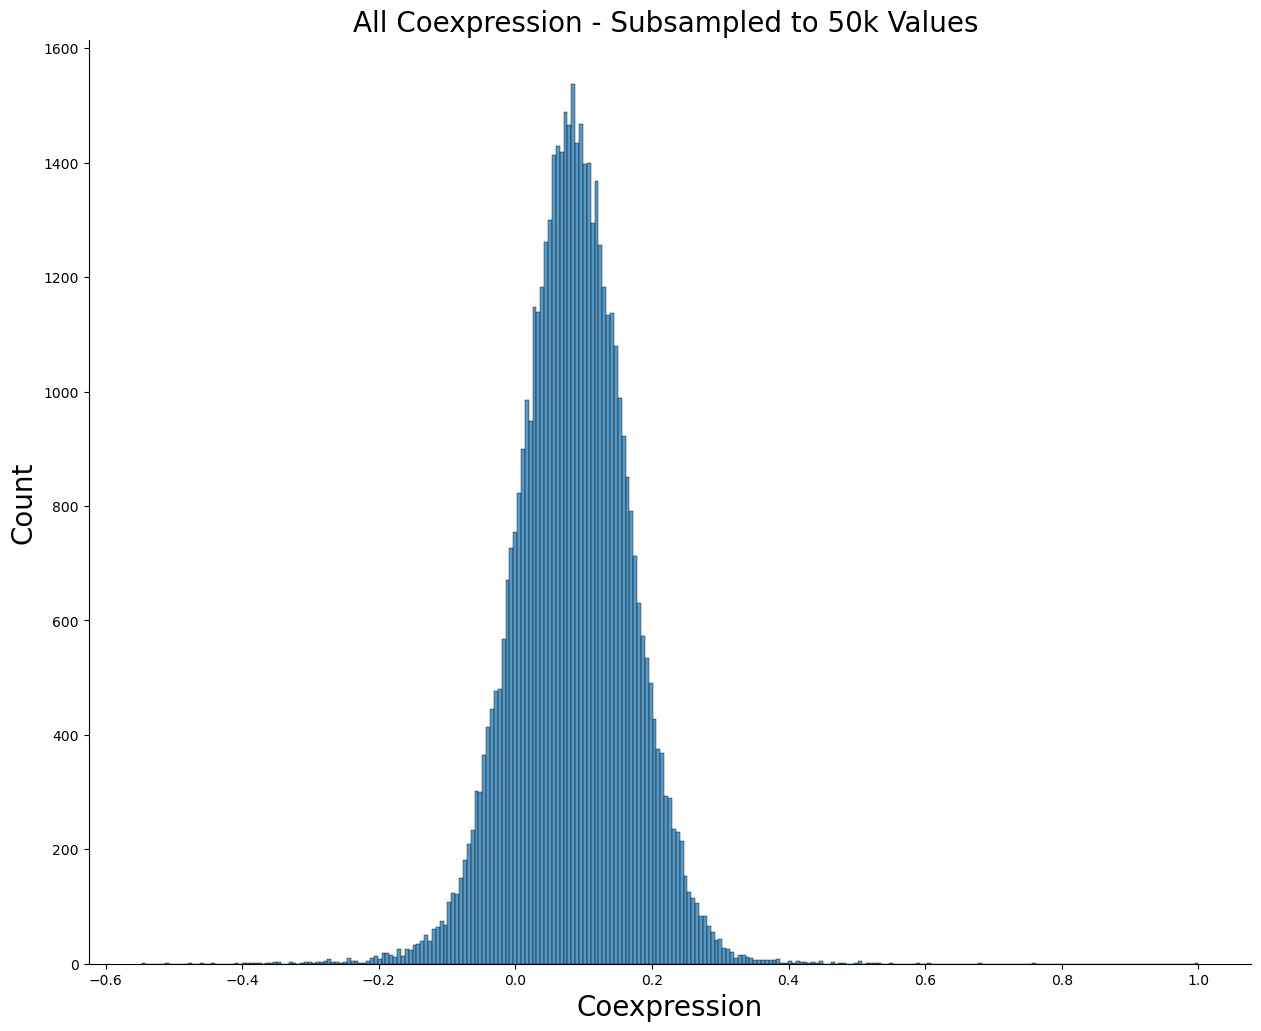

In [66]:
fig, ax = plt.subplots(figsize = (15,12))
fig.patch.set_facecolor('white')
ax = sns.histplot(data = arabi_tester_keep_seperate.melt().sample(n = 50000), x = 'value')
plt.ylabel("Count", fontsize = 20)
plt.xlabel("Coexpression", fontsize = 20)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
#plt.xlim((0,100))
plt.title("All Coexpression - Subsampled to 50k Values ", fontsize = 20)
#plt.xticks(fontsize = 11, ticks = [0,10,20,30,40,50])
#plt.yticks(fontsize = 11)

Text(0.5, 1.0, 'Coexpression of Genes with Wuschel')

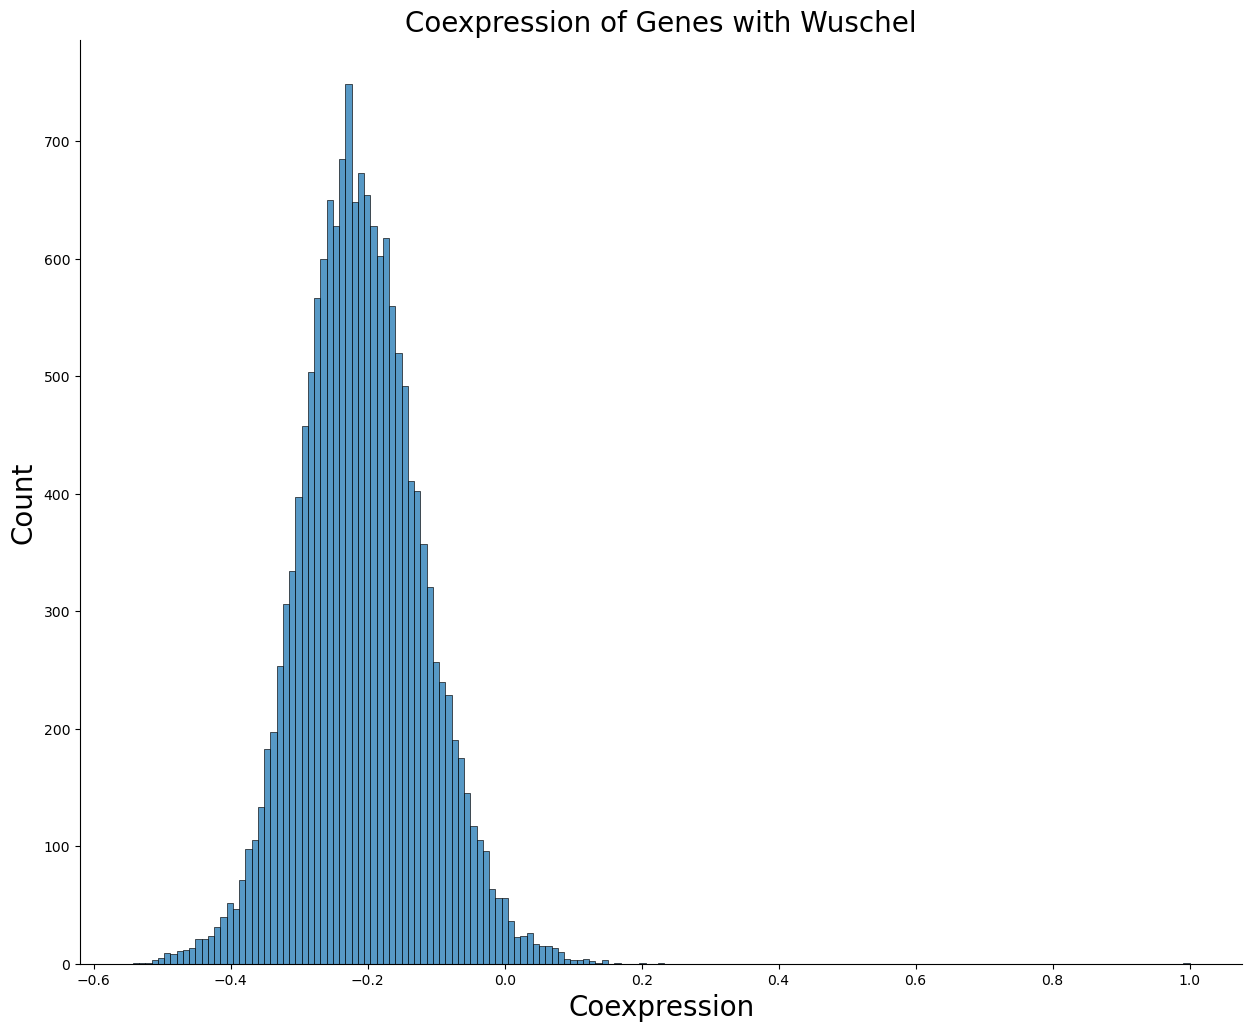

In [65]:

fig, ax = plt.subplots(figsize = (15,12))
fig.patch.set_facecolor('white')
ax = sns.histplot(arabi_tester_keep_seperate.loc[arabi_tester_keep_seperate.index == 'AT2G17950'].squeeze())
plt.ylabel("Count", fontsize = 20)
plt.xlabel("Coexpression", fontsize = 20)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
#plt.xlim((0,100))
plt.title("Coexpression of Genes with Wuschel", fontsize = 20)
#plt.xticks(fontsize = 11, ticks = [0,10,20,30,40,50])
#plt.yticks(fontsize = 11)

Text(0.5, 1.0, 'Tie Issue in Data Was Driven by Mild Negative Correlations Being at the Bottom of the Ranking for Many Genes \n Fixed Comparison By Taking the Absolute Values of Correlations')

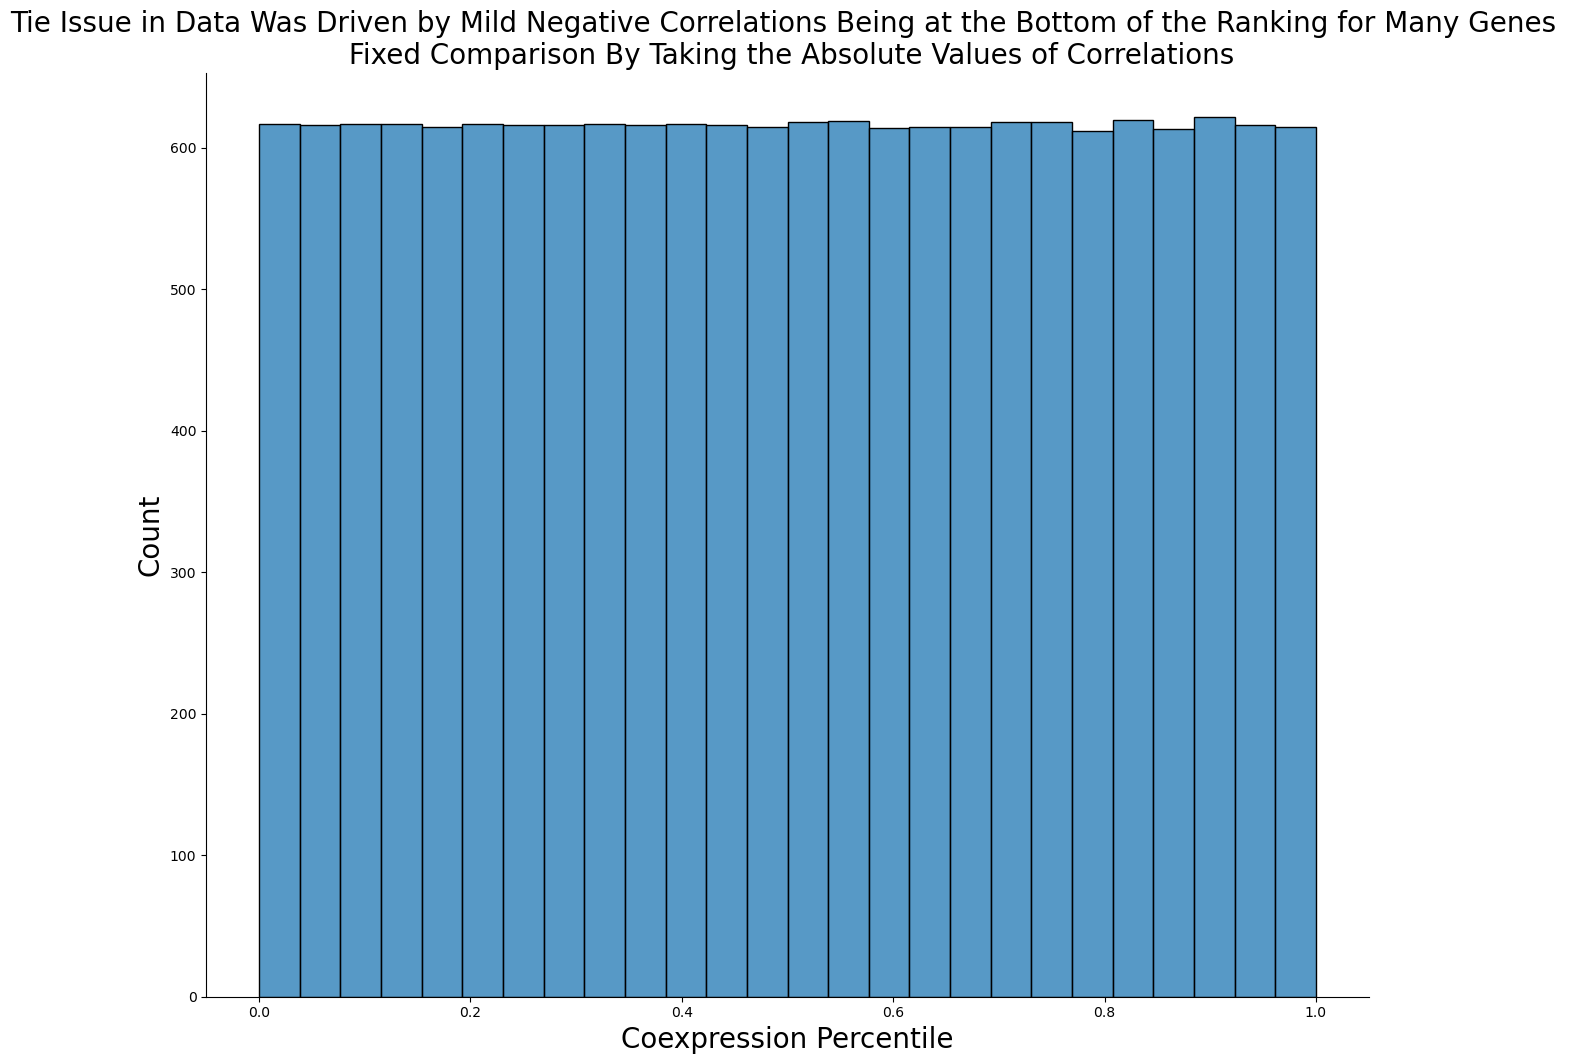

In [36]:

fig, ax = plt.subplots(figsize = (15,12))
fig.patch.set_facecolor('white')
ax = sns.histplot(arabi_wuschel_corr_results)
plt.ylabel("Count", fontsize = 20)
plt.xlabel("Coexpression Percentile", fontsize = 20)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
#plt.xlim((0,100))
plt.title("Tie Issue in Data Was Driven by Mild Negative Correlations Being at the Bottom of the Ranking for Many Genes \n Fixed Comparison by Taking the Absolute Values of Correlations", fontsize = 20)
#plt.xticks(fontsize = 11, ticks = [0,10,20,30,40,50])
#plt.yticks(fontsize = 11)

In [ ]:
#arabi_wuschel_corr_results.to_csv("/home/passala/Gene_duplication_project/Code/Jack_Dave_maize_project/Files_for_Jack_correlation/arabi_wuschel_only_wuschel_correlation.csv")

In [ ]:
#arabi_normalized_wuschel.to_csv("/home/passala/Gene_duplication_project/Code/Jack_Dave_maize_project/Files_for_Jack_correlation/arabi_wuschel_correlation.csv")

In [26]:
arabidopsis_adk_genes = ['AT3G09820','AT5G03300']
arabidopsis_PFKB_genes = ['AT1G19600','AT1G17160','AT4G27600','AT5G43910','AT4G28706']

In [32]:
arabi_wuschel_corr_results[arabidopsis_adk_genes]

_index
AT3G09820    0.165783
AT5G03300    0.679354
Name: AT2G17950, dtype: float64

In [33]:
arabi_wuschel_corr_results[arabidopsis_PFKB_genes]

_index
AT1G19600    0.971049
AT1G17160    0.248425
AT4G27600    0.996319
AT5G43910    0.779404
AT4G28706    0.997598
Name: AT2G17950, dtype: float64

In [4]:
sc.pp.filter_genes(data = arabi_single_cell,min_cells = 10)
arabi_single_cell

filtered out 2126 genes that are detected in less than 10 cells


AnnData object with n_obs × n_vars = 20224 × 21213
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'RNA_snn_res.0.5', 'seurat_clusters', 'source', 'integrated_snn_res.0.5', 'integrated_snn_res.0.75', 'integrated_snn_res.1', 'integrated_snn_res.1.2', 'integrated_snn_res.1.5', 'integrated_snn_res.2', 'integrated_snn_res.0.45', 'integrated_snn_res.0.25', 'integrated_snn_res.0.7', 'integrated_snn_res.0.8', 'integrated_snn_res.0.65', 'integrated_snn_res.0.6', 'integrated_snn_res.0.55', 'integrated_snn_res.0.53', 'integrated_snn_res.0.52', 'integrated_snn_res.0.54'
    var: 'features', 'n_cells'
    obsm: 'X_umap'

In [8]:
arabi_all_cells_cells_correlation = sparse_corr(arabi_single_cell.X)
arabi_all_cells_cells_correlation = pd.DataFrame(data = arabi_all_cells_cells_correlation, columns = arabi_single_cell.var.index, index = arabi_single_cell.var.index)
arabi_all_cells_cells_correlation


_index,AT1G01010,AT1G01020,AT1G01030,AT1G01040,AT1G01050,AT1G01060,AT1G01080,AT1G01090,AT1G01100,AT1G01110,...,ATMG01275,ATMG01320,ATMG01390,ATMG00020,ATMG00180,ATMG00650,ATMG00510,AT1G18880,AT3G50560,AT5G07780
_index,,,,,,,,,,,,,,,,,,,,,
AT1G01010,1.000000,-0.006949,0.060596,0.007819,-0.035520,-0.025327,-0.016033,-0.013612,-0.064670,-0.019813,...,0.006300,0.005408,-0.005185,-0.016287,-0.009582,-0.002237,0.003058,0.011354,-0.000730,0.009019
AT1G01020,-0.006949,1.000000,-0.001789,0.023535,0.043745,0.020341,0.042627,0.038192,0.096841,0.045947,...,-0.005623,-0.004074,0.000973,0.002184,0.009232,0.023242,0.009436,0.001755,0.005757,-0.006266
AT1G01030,0.060596,-0.001789,1.000000,-0.002321,-0.014772,-0.008220,-0.004589,0.008389,-0.033160,-0.012976,...,-0.001918,-0.001935,0.002781,-0.012960,0.006321,-0.000295,-0.002665,-0.001840,-0.001487,-0.001650
AT1G01040,0.007819,0.023535,-0.002321,1.000000,0.040939,0.039778,0.011662,0.031563,0.055404,0.024840,...,0.000900,0.007604,0.004741,0.019505,0.003292,0.000315,0.003427,0.000854,-0.002978,-0.004280
AT1G01050,-0.035520,0.043745,-0.014772,0.040939,1.000000,0.055960,0.050795,0.101943,0.178810,0.083328,...,-0.000707,-0.007545,0.003452,0.012140,-0.003441,0.005861,0.014162,0.007327,-0.003509,-0.001307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATMG00650,-0.002237,0.023242,-0.000295,0.000315,0.005861,-0.011142,-0.002501,-0.004058,0.022942,0.011947,...,-0.001678,-0.001692,0.032681,0.040532,0.017018,1.000000,-0.001359,-0.001610,-0.000427,-0.001443
ATMG00510,0.003058,0.009436,-0.002665,0.003427,0.014162,-0.005462,-0.004552,0.000591,-0.002370,-0.005181,...,0.000526,-0.000659,0.000374,-0.006113,-0.001901,-0.001359,1.000000,-0.000627,-0.000506,-0.000562
AT1G18880,0.011354,0.001755,-0.001840,0.000854,0.007327,-0.005363,-0.003417,0.007757,-0.010356,-0.005956,...,-0.000451,-0.000455,-0.002901,-0.002565,-0.001431,-0.001610,-0.000627,1.000000,-0.000350,-0.000388


In [9]:
arabi_all_cells_cells_correlation = arabi_all_cells_cells_correlation.replace(0,np.NaN)
arabi_all_cells_cells_correlation

_index,AT1G01010,AT1G01020,AT1G01030,AT1G01040,AT1G01050,AT1G01060,AT1G01080,AT1G01090,AT1G01100,AT1G01110,...,ATMG01275,ATMG01320,ATMG01390,ATMG00020,ATMG00180,ATMG00650,ATMG00510,AT1G18880,AT3G50560,AT5G07780
_index,,,,,,,,,,,,,,,,,,,,,
AT1G01010,1.000000,-0.006949,0.060596,0.007819,-0.035520,-0.025327,-0.016033,-0.013612,-0.064670,-0.019813,...,0.006300,0.005408,-0.005185,-0.016287,-0.009582,-0.002237,0.003058,0.011354,-0.000730,0.009019
AT1G01020,-0.006949,1.000000,-0.001789,0.023535,0.043745,0.020341,0.042627,0.038192,0.096841,0.045947,...,-0.005623,-0.004074,0.000973,0.002184,0.009232,0.023242,0.009436,0.001755,0.005757,-0.006266
AT1G01030,0.060596,-0.001789,1.000000,-0.002321,-0.014772,-0.008220,-0.004589,0.008389,-0.033160,-0.012976,...,-0.001918,-0.001935,0.002781,-0.012960,0.006321,-0.000295,-0.002665,-0.001840,-0.001487,-0.001650
AT1G01040,0.007819,0.023535,-0.002321,1.000000,0.040939,0.039778,0.011662,0.031563,0.055404,0.024840,...,0.000900,0.007604,0.004741,0.019505,0.003292,0.000315,0.003427,0.000854,-0.002978,-0.004280
AT1G01050,-0.035520,0.043745,-0.014772,0.040939,1.000000,0.055960,0.050795,0.101943,0.178810,0.083328,...,-0.000707,-0.007545,0.003452,0.012140,-0.003441,0.005861,0.014162,0.007327,-0.003509,-0.001307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATMG00650,-0.002237,0.023242,-0.000295,0.000315,0.005861,-0.011142,-0.002501,-0.004058,0.022942,0.011947,...,-0.001678,-0.001692,0.032681,0.040532,0.017018,1.000000,-0.001359,-0.001610,-0.000427,-0.001443
ATMG00510,0.003058,0.009436,-0.002665,0.003427,0.014162,-0.005462,-0.004552,0.000591,-0.002370,-0.005181,...,0.000526,-0.000659,0.000374,-0.006113,-0.001901,-0.001359,1.000000,-0.000627,-0.000506,-0.000562
AT1G18880,0.011354,0.001755,-0.001840,0.000854,0.007327,-0.005363,-0.003417,0.007757,-0.010356,-0.005956,...,-0.000451,-0.000455,-0.002901,-0.002565,-0.001431,-0.001610,-0.000627,1.000000,-0.000350,-0.000388


In [10]:

arabi_all_cells_cells_correlation = arabi_all_cells_cells_correlation.dropna(axis = 0, how = 'all')
arabi_all_cells_cells_correlation = arabi_all_cells_cells_correlation.dropna(axis = 1, how = 'all')
arabi_ranked_columns_all_cells = arabi_all_cells_cells_correlation.rank()
arabi_ranked_columns_all_cells

_index,AT1G01010,AT1G01020,AT1G01030,AT1G01040,AT1G01050,AT1G01060,AT1G01080,AT1G01090,AT1G01100,AT1G01110,...,ATMG01275,ATMG01320,ATMG01390,ATMG00020,ATMG00180,ATMG00650,ATMG00510,AT1G18880,AT3G50560,AT5G07780
_index,,,,,,,,,,,,,,,,,,,,,
AT1G01010,21213.0,1940.0,20974.0,9133.0,615.0,744.0,862.0,1076.0,1135.0,1092.0,...,18433.0,18081.0,5529.0,3877.0,2338.0,7841.0,16969.0,19838.0,12349.0,19846.0
AT1G01020,7860.0,21213.0,11400.0,17033.0,15144.0,11755.0,19537.0,13013.0,17141.0,16877.0,...,1178.0,4203.0,13092.0,14733.0,19062.0,20712.0,19669.0,17045.0,18974.0,1258.0
AT1G01030,20594.0,3993.0,21213.0,3564.0,1533.0,2305.0,3099.0,6366.0,2104.0,1669.0,...,7721.0,8608.0,14581.0,5196.0,18219.0,11268.0,6779.0,10586.0,9302.0,9942.0
AT1G01040,15948.0,14504.0,10447.0,21213.0,14646.0,16840.0,11273.0,11597.0,13445.0,12328.0,...,15259.0,18948.0,16013.0,19885.0,16925.0,11983.0,17193.0,16619.0,4863.0,3258.0
AT1G01050,750.0,19238.0,1778.0,20483.0,21213.0,19335.0,20191.0,20149.0,19973.0,20336.0,...,11966.0,670.0,15096.0,18577.0,8582.0,16559.0,20473.0,19010.0,3621.0,11118.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATMG00650,11625.0,14406.0,12676.0,4954.0,5971.0,1828.0,4650.0,2792.0,9579.0,8883.0,...,8396.0,9246.0,20970.0,20882.0,20363.0,21213.0,10175.0,11168.0,14218.0,10658.0
ATMG00510,14320.0,8924.0,9952.0,6636.0,8420.0,3134.0,3124.0,4066.0,5077.0,3417.0,...,14915.0,12794.0,12542.0,9216.0,11412.0,9838.0,21213.0,14446.0,13675.0,14433.0
AT1G18880,16774.0,5619.0,11290.0,5232.0,6434.0,3179.0,3919.0,6200.0,3877.0,3099.0,...,13497.0,13961.0,8428.0,11701.0,12590.0,9281.0,13084.0,21213.0,14869.0,15646.0


In [11]:
arabi_double_ranked_all_cells = arabi_ranked_columns_all_cells.rank(axis = 1)
arabi_double_ranked_all_cells 

_index,AT1G01010,AT1G01020,AT1G01030,AT1G01040,AT1G01050,AT1G01060,AT1G01080,AT1G01090,AT1G01100,AT1G01110,...,ATMG01275,ATMG01320,ATMG01390,ATMG00020,ATMG00180,ATMG00650,ATMG00510,AT1G18880,AT3G50560,AT5G07780
_index,,,,,,,,,,,,,,,,,,,,,
AT1G01010,21213.0,7583.0,21137.0,14132.5,1011.5,1750.0,2599.0,4176.5,4556.5,4273.0,...,18528.0,18281.5,11893.0,10425.5,8441.5,13443.0,17605.5,19777.0,15542.0,19792.5
AT1G01020,4176.5,21213.0,7211.0,17380.5,13393.5,7638.0,20620.0,9430.5,17600.5,17061.0,...,303.0,1891.5,9563.5,12504.0,20266.5,21138.0,20707.0,17409.5,20193.5,340.0
AT1G01030,20877.5,8705.5,21213.0,8051.0,2890.5,5495.5,7215.0,11774.5,4907.0,3413.0,...,13256.0,14109.0,17432.0,10382.5,19301.0,15938.5,12236.5,15556.5,14688.0,15144.5
AT1G01040,17537.5,15488.5,7939.5,21213.0,15733.0,18565.5,9450.5,10085.5,13748.5,11541.0,...,16612.0,20376.0,17619.0,20872.0,18650.5,10900.0,18947.0,18335.5,2413.5,1439.5
AT1G01050,623.5,15131.0,1707.5,19913.0,21213.0,15467.5,18813.0,18640.5,17921.5,19349.5,...,5260.0,530.5,7438.0,13057.0,4037.0,9147.5,19875.0,14337.0,2597.0,4873.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATMG00650,17664.0,19424.0,18456.0,6754.5,8826.5,1384.5,6136.0,2866.5,15389.5,14306.5,...,13505.5,14884.0,21110.0,21079.0,20973.0,21213.0,16164.5,17260.0,19339.0,16735.5
ATMG00510,19814.0,14319.0,15638.5,10762.0,13554.0,3118.5,3097.5,5225.0,7511.5,3727.0,...,20111.5,18705.0,18496.5,14710.0,17364.0,15490.0,21213.0,19877.0,19428.5,19868.5
AT1G18880,20501.0,9955.5,16647.5,9271.5,11157.5,4615.5,6571.5,10830.5,6458.5,4395.0,...,18829.0,19188.5,13566.5,17086.0,17947.5,14528.5,18435.0,21213.0,19790.5,20158.0


In [12]:
arabi_normalized_all_cells = arabi_double_ranked_all_cells/21213  
arabi_normalized_all_cells

_index,AT1G01010,AT1G01020,AT1G01030,AT1G01040,AT1G01050,AT1G01060,AT1G01080,AT1G01090,AT1G01100,AT1G01110,...,ATMG01275,ATMG01320,ATMG01390,ATMG00020,ATMG00180,ATMG00650,ATMG00510,AT1G18880,AT3G50560,AT5G07780
_index,,,,,,,,,,,,,,,,,,,,,
AT1G01010,1.000000,0.357469,0.996417,0.666219,0.047683,0.082497,0.122519,0.196884,0.214798,0.201433,...,0.873427,0.861806,0.560647,0.491467,0.397940,0.633715,0.829939,0.932306,0.732664,0.933036
AT1G01020,0.196884,1.000000,0.339933,0.819332,0.631382,0.360062,0.972045,0.444562,0.829703,0.804271,...,0.014284,0.089167,0.450832,0.589450,0.955381,0.996464,0.976147,0.820700,0.951940,0.016028
AT1G01030,0.984184,0.410385,1.000000,0.379531,0.136261,0.259063,0.340122,0.555061,0.231320,0.160892,...,0.624900,0.665111,0.821760,0.489440,0.909867,0.751355,0.576840,0.733347,0.692406,0.713925
AT1G01040,0.826734,0.730142,0.374275,1.000000,0.741668,0.875194,0.445505,0.475440,0.648117,0.544053,...,0.783105,0.960543,0.830576,0.983925,0.879201,0.513836,0.893179,0.864352,0.113775,0.067859
AT1G01050,0.029392,0.713289,0.080493,0.938717,1.000000,0.729152,0.886862,0.878730,0.844836,0.912153,...,0.247961,0.025008,0.350634,0.615519,0.190308,0.431221,0.936925,0.675859,0.122425,0.229741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATMG00650,0.832697,0.915665,0.870033,0.318413,0.416089,0.065267,0.289257,0.135129,0.725475,0.674421,...,0.636661,0.701645,0.995144,0.993683,0.988686,1.000000,0.762009,0.813652,0.911658,0.788927
ATMG00510,0.934050,0.675011,0.737213,0.507330,0.638948,0.147009,0.146019,0.246311,0.354099,0.175694,...,0.948074,0.881771,0.871942,0.693443,0.818555,0.730213,1.000000,0.937020,0.915877,0.936619
AT1G18880,0.966436,0.469311,0.784778,0.437067,0.525975,0.217579,0.309786,0.510560,0.304460,0.207184,...,0.887616,0.904563,0.639537,0.805449,0.846061,0.684887,0.869043,1.000000,0.932942,0.950266


In [13]:
arabi_all_cells_results = arabi_normalized_all_cells.loc[arabi_normalized_all_cells.index =='AT2G17950'].squeeze()

In [33]:
arabi_normalized_all_cells.to_csv('/home/passala/Gene_duplication_project/Code/Jack_Dave_maize_project/Files_for_Jack_correlation/dropped_low_expression_genes_arabi_normalized_all_cells_correlation.csv')

In [14]:
arabi_clev_results = arabi_normalized_all_cells.loc[arabi_normalized_all_cells.index =='AT2G27250'].squeeze()

In [15]:
arabi_single_cell_trimmed_to_clevata_expressing_genes = arabi_single_cell[(arabi_single_cell[:,'AT2G27250'].X>0), : ]


In [18]:
sc.pp.filter_genes(data = arabi_single_cell_trimmed_to_clevata_expressing_genes,min_cells = 10)
arabi_single_cell_trimmed_to_clevata_expressing_genes

filtered out 4657 genes that are detected in less than 10 cells


/home/passala/miniconda3/envs/Single_cell_data/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/home/passala/miniconda3/envs/Single_cell_data/lib/python3.9/contextlib.py:126: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)


AnnData object with n_obs × n_vars = 386 × 16556
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'RNA_snn_res.0.5', 'seurat_clusters', 'source', 'integrated_snn_res.0.5', 'integrated_snn_res.0.75', 'integrated_snn_res.1', 'integrated_snn_res.1.2', 'integrated_snn_res.1.5', 'integrated_snn_res.2', 'integrated_snn_res.0.45', 'integrated_snn_res.0.25', 'integrated_snn_res.0.7', 'integrated_snn_res.0.8', 'integrated_snn_res.0.65', 'integrated_snn_res.0.6', 'integrated_snn_res.0.55', 'integrated_snn_res.0.53', 'integrated_snn_res.0.52', 'integrated_snn_res.0.54'
    var: 'features', 'n_cells'
    obsm: 'X_umap'

In [19]:
arabi_single_cell_clevata_expressing_pd = pd.DataFrame(data = arabi_single_cell_trimmed_to_clevata_expressing_genes.X.todense(), columns = arabi_single_cell_trimmed_to_clevata_expressing_genes.var.index, index = arabi_single_cell_trimmed_to_clevata_expressing_genes.obs.index)
arabi_single_cell_clevata_expressing_pd

_index,AT1G01010,AT1G01020,AT1G01040,AT1G01050,AT1G01060,AT1G01080,AT1G01090,AT1G01100,AT1G01110,AT1G01120,...,ATCG01080,ATCG01090,ATCG01100,ATCG01110,ATCG01120,ATCG01130,ATMG01390,ATMG00020,ATMG00180,ATMG00650
AACACACAGTACCCTA-1_1,0.000000,0.000000,0.245874,0.443066,0.000000,0.000000,0.749032,1.794636,0.872836,1.331674,...,0.0,0.000000,0.000000,0.000000,0.0,2.665798,0.000000,0.607706,0.0,0.0
AACGGGACATGGTGGA-1_1,0.000000,0.000000,0.342950,0.597845,0.000000,0.000000,0.597845,2.965759,0.000000,0.342950,...,0.0,0.342950,0.000000,0.000000,0.0,2.830553,0.597845,1.239704,0.0,0.0
AAGAACATCAGCCTTC-1_1,0.000000,0.000000,0.000000,1.613450,0.000000,1.101957,0.000000,2.712729,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,2.837932,0.000000,1.613450,0.0,0.0
AAGACTCTCAGTCCGG-1_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.695140,2.807348,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,3.469848,0.000000,0.000000,0.0,0.0
AAGTCGTGTATGTGTC-1_1,0.166965,0.435113,0.166965,0.310000,0.000000,0.546299,0.737296,2.707507,0.000000,1.362872,...,0.0,0.310000,0.000000,0.000000,0.0,2.491920,0.000000,0.310000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTCTAACTCGGACCAC-1_2,0.000000,0.163914,0.163914,0.163914,0.163914,0.163914,0.726911,2.600312,0.163914,1.593003,...,0.0,0.000000,0.000000,0.000000,0.0,1.696136,0.000000,0.304706,0.0,0.0
TTGACCCCACGAGAAC-1_2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.554651,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,1.053167,0.000000,1.887092,0.0,0.0
TTGGTTTGTGGAGAAA-1_2,0.000000,0.487269,0.487269,0.000000,0.487269,0.000000,0.813473,2.776876,0.487269,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,3.078212,0.000000,0.487269,0.0,0.0
TTTAGTCGTTCATCTT-1_2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.715044,3.132438,0.000000,0.000000,...,0.0,0.715044,0.000000,0.000000,0.0,2.985530,0.000000,0.000000,0.0,0.0


In [20]:
arabi_single_cellclevata_expressing_cells_correlation = arabi_single_cell_clevata_expressing_pd.corr(method = 'spearman')
arabi_single_cellclevata_expressing_cells_correlation = arabi_single_cellclevata_expressing_cells_correlation.dropna(axis = 0, how = 'all')
arabi_single_cellclevata_expressing_cells_correlation = arabi_single_cellclevata_expressing_cells_correlation.dropna(axis = 1, how = 'all')
arabi_ranked_columns_clevata = arabi_single_cellclevata_expressing_cells_correlation.rank()
arabi_ranked_columns_clevata

_index,AT1G01010,AT1G01020,AT1G01040,AT1G01050,AT1G01060,AT1G01080,AT1G01090,AT1G01100,AT1G01110,AT1G01120,...,ATCG01080,ATCG01090,ATCG01100,ATCG01110,ATCG01120,ATCG01130,ATMG01390,ATMG00020,ATMG00180,ATMG00650
_index,,,,,,,,,,,,,,,,,,,,,
AT1G01010,16556.0,1904.0,1320.0,4798.0,9977.0,2146.0,5343.0,7026.0,6315.0,9383.0,...,4551.0,6495.0,4399.0,8581.0,5435.0,8594.0,14646.0,6468.0,4483.0,10890.0
AT1G01020,4684.0,16556.0,15080.0,16320.0,1719.0,4754.0,4102.0,14331.0,12399.0,6253.0,...,10768.0,9950.0,14945.0,7952.0,14388.0,12815.0,11953.0,12001.0,15425.0,15865.0
AT1G01040,4267.0,15618.0,16556.0,11139.0,16017.0,13089.0,11301.0,10383.0,10079.0,12192.0,...,13321.0,12233.0,12630.0,16471.0,16154.0,13505.0,15673.0,16321.0,14950.0,15489.0
AT1G01050,6540.0,15665.0,6970.0,16556.0,1104.0,9083.0,537.0,15440.0,1827.0,920.0,...,6704.0,8878.0,5672.0,7116.0,10978.0,10083.0,8037.0,8942.0,9459.0,6406.0
AT1G01060,14537.0,1979.0,16208.0,1711.0,16556.0,15235.0,6248.0,8365.0,14414.0,11065.0,...,5990.0,3938.0,9090.0,7511.0,7463.0,1841.0,5395.0,9659.0,9487.0,8491.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATCG01130,1070.0,1336.0,1448.0,759.0,20.0,331.0,19.0,16264.0,149.0,36.0,...,16270.0,16525.0,15487.0,16507.0,16490.0,16556.0,15652.0,16513.0,15958.0,14882.0
ATMG01390,14152.0,7710.0,12908.0,5693.0,1754.0,558.0,352.0,9804.0,3264.0,12580.0,...,11038.0,16140.0,14921.0,16540.0,16519.0,16233.0,16556.0,15453.0,15262.0,16195.0
ATMG00020,3380.0,3797.0,12448.0,3215.0,2010.0,265.0,65.0,12509.0,875.0,4121.0,...,15193.0,15978.0,14815.0,16449.0,15954.0,16415.0,12900.0,16556.0,16382.0,13799.0


In [21]:
arabi_double_ranked_clevata = arabi_ranked_columns_clevata.rank(axis = 1)
arabi_double_ranked_clevata
arabi_normalized_clevata = arabi_double_ranked_clevata/16556 


In [22]:
arabi_normalized_clevata

_index,AT1G01010,AT1G01020,AT1G01040,AT1G01050,AT1G01060,AT1G01080,AT1G01090,AT1G01100,AT1G01110,AT1G01120,...,ATCG01080,ATCG01090,ATCG01100,ATCG01110,ATCG01120,ATCG01130,ATMG01390,ATMG00020,ATMG00180,ATMG00650
_index,,,,,,,,,,,,,,,,,,,,,
AT1G01010,1.000000,0.155352,0.093803,0.453008,0.778449,0.179542,0.499758,0.621557,0.572089,0.748490,...,0.430237,0.585951,0.415982,0.706783,0.506916,0.707357,0.943253,0.583957,0.423713,0.816018
AT1G01020,0.164895,1.000000,0.918700,0.990094,0.023617,0.170422,0.130074,0.874185,0.744564,0.274342,...,0.622282,0.561247,0.910365,0.401697,0.877627,0.774221,0.712159,0.716538,0.941381,0.968138
AT1G01040,0.075562,0.942740,1.000000,0.554482,0.968803,0.732514,0.569250,0.489551,0.461525,0.651486,...,0.753443,0.655503,0.691200,0.996436,0.977470,0.769147,0.946515,0.987739,0.891580,0.933378
AT1G01050,0.472820,0.982242,0.511446,1.000000,0.028449,0.677247,0.006554,0.976625,0.071515,0.020627,...,0.488343,0.662811,0.394661,0.523375,0.795875,0.743114,0.598393,0.667402,0.701679,0.461011
AT1G01060,0.816502,0.015946,0.972246,0.011657,1.000000,0.881614,0.155895,0.282768,0.802972,0.497222,...,0.143332,0.064508,0.334048,0.225930,0.223363,0.013530,0.117148,0.376872,0.364098,0.292764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATCG01130,0.630768,0.670059,0.682985,0.566351,0.053123,0.404566,0.050163,0.988041,0.264466,0.095434,...,0.988161,0.997403,0.976202,0.996708,0.996195,1.000000,0.977833,0.996920,0.981517,0.971612
ATMG01390,0.941169,0.678666,0.901546,0.556807,0.182109,0.041224,0.022016,0.785455,0.347850,0.891187,...,0.835468,0.989279,0.960770,0.999094,0.998671,0.991604,1.000000,0.973937,0.969497,0.990879
ATMG00020,0.580696,0.619504,0.957417,0.563149,0.409247,0.053244,0.005587,0.958142,0.192951,0.646684,...,0.987497,0.993688,0.983692,0.997222,0.993597,0.996859,0.963518,1.000000,0.996678,0.974118


In [23]:
arabi_clevata_corr_results = arabi_normalized_clevata.loc[arabi_normalized_clevata.index =='AT2G27250'].squeeze()

In [ ]:
#arabi_clevata_corr_results.to_csv('/home/passala/Gene_duplication_project/Code/Jack_Dave_maize_project/Files_for_Jack_correlation/arabi_clevata_only_clevata_cells_correlation.csv')

In [ ]:
#arabi_normalized_clevata.to_csv('/home/passala/Gene_duplication_project/Code/Jack_Dave_maize_project/Files_for_Jack_correlation/arabi_clevata_cells_correlation.csv')

In [27]:
arabi_all_cells_results[arabidopsis_adk_genes]

_index
AT3G09820    0.368383
AT5G03300    0.436313
Name: AT2G17950, dtype: float64

In [28]:
arabi_all_cells_results[arabidopsis_PFKB_genes]

_index
AT1G19600    0.249163
AT1G17160    0.555061
AT4G27600    0.388488
AT5G43910    0.287795
AT4G28706    0.142554
Name: AT2G17950, dtype: float64

In [29]:
arabi_clev_results[arabidopsis_adk_genes]

_index
AT3G09820    0.511856
AT5G03300    0.613044
Name: AT2G27250, dtype: float64

In [30]:
arabi_clev_results[arabidopsis_PFKB_genes]

_index
AT1G19600    0.140503
AT1G17160    0.536251
AT4G27600    0.143921
AT5G43910    0.238486
AT4G28706    0.283718
Name: AT2G27250, dtype: float64

In [31]:
arabi_clevata_corr_results[arabidopsis_adk_genes]

_index
AT3G09820    0.932321
AT5G03300    0.294999
Name: AT2G27250, dtype: float64

In [32]:
arabi_clevata_corr_results[arabidopsis_PFKB_genes]

_index
AT1G19600    0.294999
AT1G17160    0.294999
AT4G27600    0.294999
AT5G43910    0.294999
AT4G28706    0.294999
Name: AT2G27250, dtype: float64